In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
import yellowbrick
import shap
import scipy.cluster.hierarchy as shc
import optuna
import matplotlib.patches as patches
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from matplotlib.patches import Rectangle
from pywaffle import Waffle
from math import isnan
from random import sample
from numpy.random import uniform
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, balanced_accuracy_score, f1_score, cohen_kappa_score, classification_report
from scipy import stats
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.metrics import make_scorer, cohen_kappa_score, recall_score, precision_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import RFE, f_classif
from sklearn.feature_selection import mutual_info_classif
from xgboost import XGBClassifier
from pyswarms.single import GlobalBestPSO
from sklearn.preprocessing import PowerTransformer
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.svm import SVC
from imblearn.over_sampling import ADASYN
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.inspection import permutation_importance

# Read Data

In [2]:
file_path = r"D:\Kuliah IPB\02 Kuliah\03 Semester 3\Pemodelan Klasifikasi\UAS\df_model.csv"
df_model = pd.read_csv(file_path, index_col=0)
df_model

,R105,KALORI_KAP,PROTE_KAP,LEMAK_KAP,KARBO_KAP,FOOD_LABEL,Pengeluaran_Jenis_A,Pengeluaran_Jenis_B,Pengeluaran_Jenis_C,Pengeluaran_Jenis_D,...,Pengeluaran_Jenis_M,Pengeluaran_Jenis_N,R2208A2,R2208A3,R2208A4,R2208A5,nilai_bantuan(rp),rataan_beras(rp),rataan_telur(rp),rataan_lainnya(rp)
URUT,,,,,,,,,,,,,,,,,,,,,
500001,2,2365.173362,67.130240,43.222388,352.985743,0,1,1,1,1,...,1,0,Tidak,Tidak,Ya,Tidak,150000.0,50000.0,10000.0,17500.0
500002,1,2611.639071,69.091893,30.118243,471.997686,0,1,1,1,0,...,1,1,Tidak,Tidak,Tidak,Ya,150000.0,27500.0,6500.0,8000.0
500003,2,2526.510476,68.742619,58.517619,360.456190,0,1,0,1,1,...,1,1,Tidak,Tidak,Ya,Tidak,100000.0,60000.0,15000.0,25000.0
500004,1,3655.854810,141.502615,119.460426,454.939531,0,1,1,1,1,...,1,1,Tidak,Tidak,Tidak,Tidak,0.0,0.0,0.0,0.0
500005,1,2330.987934,78.533354,53.141607,254.846110,0,1,0,1,1,...,1,1,Tidak,Tidak,Tidak,Tidak,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525886,1,2227.460536,81.321857,45.307661,306.247218,0,1,1,1,1,...,1,1,Tidak,Tidak,Tidak,Tidak,0.0,0.0,0.0,0.0
525887,1,1711.114357,68.675743,46.467657,212.155300,0,1,0,1,1,...,1,0,Tidak,Tidak,Tidak,Tidak,0.0,0.0,0.0,0.0
525888,1,1621.781673,48.896660,45.535567,215.970774,0,1,0,0,1,...,1,1,Tidak,Tidak,Tidak,Tidak,0.0,0.0,0.0,0.0


In [3]:
categorical_columns = ['R2208A2', 'R2208A3', 'R2208A4', 'R2208A5']
for col in categorical_columns:
    df_model[col] = df_model[col].map({'Tidak': 0, 'Ya': 1})
df_model[categorical_columns].head()

,R2208A2,R2208A3,R2208A4,R2208A5
URUT,,,,
500001,0,0,1,0
500002,0,0,0,1
500003,0,0,1,0
500004,0,0,0,0
500005,0,0,0,0


In [4]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25890 entries, 500001 to 525890
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   R105                 25890 non-null  int64  
 1   KALORI_KAP           25890 non-null  float64
 2   PROTE_KAP            25890 non-null  float64
 3   LEMAK_KAP            25890 non-null  float64
 4   KARBO_KAP            25890 non-null  float64
 5   FOOD_LABEL           25890 non-null  int64  
 6   Pengeluaran_Jenis_A  25890 non-null  int64  
 7   Pengeluaran_Jenis_B  25890 non-null  int64  
 8   Pengeluaran_Jenis_C  25890 non-null  int64  
 9   Pengeluaran_Jenis_D  25890 non-null  int64  
 10  Pengeluaran_Jenis_E  25890 non-null  int64  
 11  Pengeluaran_Jenis_F  25890 non-null  int64  
 12  Pengeluaran_Jenis_G  25890 non-null  int64  
 13  Pengeluaran_Jenis_H  25890 non-null  int64  
 14  Pengeluaran_Jenis_I  25890 non-null  int64  
 15  Pengeluaran_Jenis_J  25890 non-null

# PraProses Data

## Pencilan

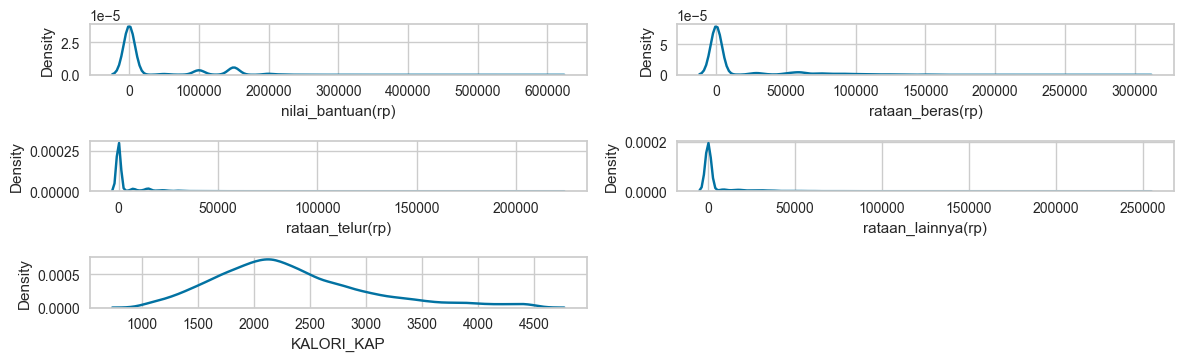

In [5]:
cols = ['nilai_bantuan(rp)', 'rataan_beras(rp)', 'rataan_telur(rp)', 'rataan_lainnya(rp)', 'KALORI_KAP']

plt.figure(figsize=(12, 8))
for i in range(len(cols)):
  plt.subplot(7, 2, i+1)
  sns.kdeplot(data=df_model, x=df_model[cols[i]])
  plt.tight_layout()

In [6]:
# # Power Transform
# for col in cols:
#   pt = PowerTransformer()
#   df_model[col] = pt.fit_transform(df_model[col].values.reshape(len(df_model), 1))
#   print('Skew value:', df_model[col].skew())

In [6]:
# Yeo-Johnson
for col in cols:
    pt = PowerTransformer(method='yeo-johnson')
    df_model[col] = pt.fit_transform(df_model[col].values.reshape(-1, 1))
    print(f"Feature: {col}, Skewness after Yeo-Johnson: {df_model[col].skew()}")

Feature: nilai_bantuan(rp), Skewness after Yeo-Johnson: 1.2751825453726524
Feature: rataan_beras(rp), Skewness after Yeo-Johnson: 1.5155835725139335
Feature: rataan_telur(rp), Skewness after Yeo-Johnson: 1.5757732441452075
Feature: rataan_lainnya(rp), Skewness after Yeo-Johnson: 1.7481814229459707
Feature: KALORI_KAP, Skewness after Yeo-Johnson: 0.00027659135064783235


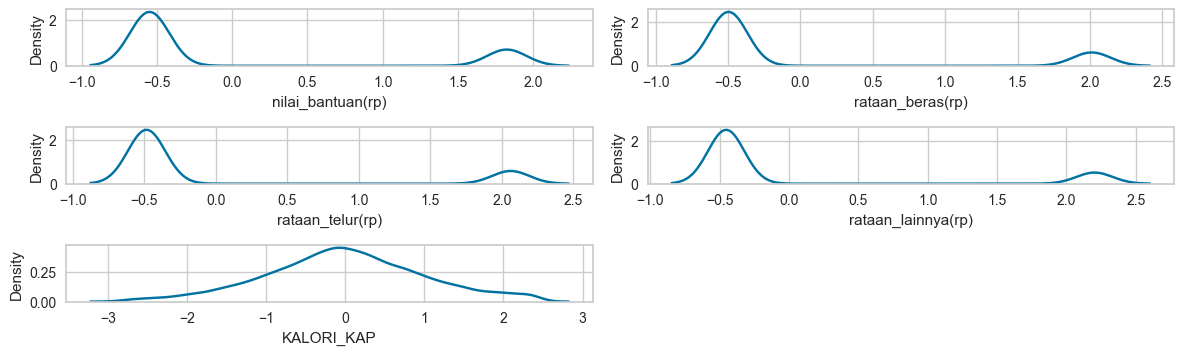

In [7]:
plt.figure(figsize=(12, 8))
for i in range(len(cols)):
  plt.subplot(7, 2, i+1)
  sns.kdeplot(data=df_model, x=df_model[cols[i]])
  plt.tight_layout()

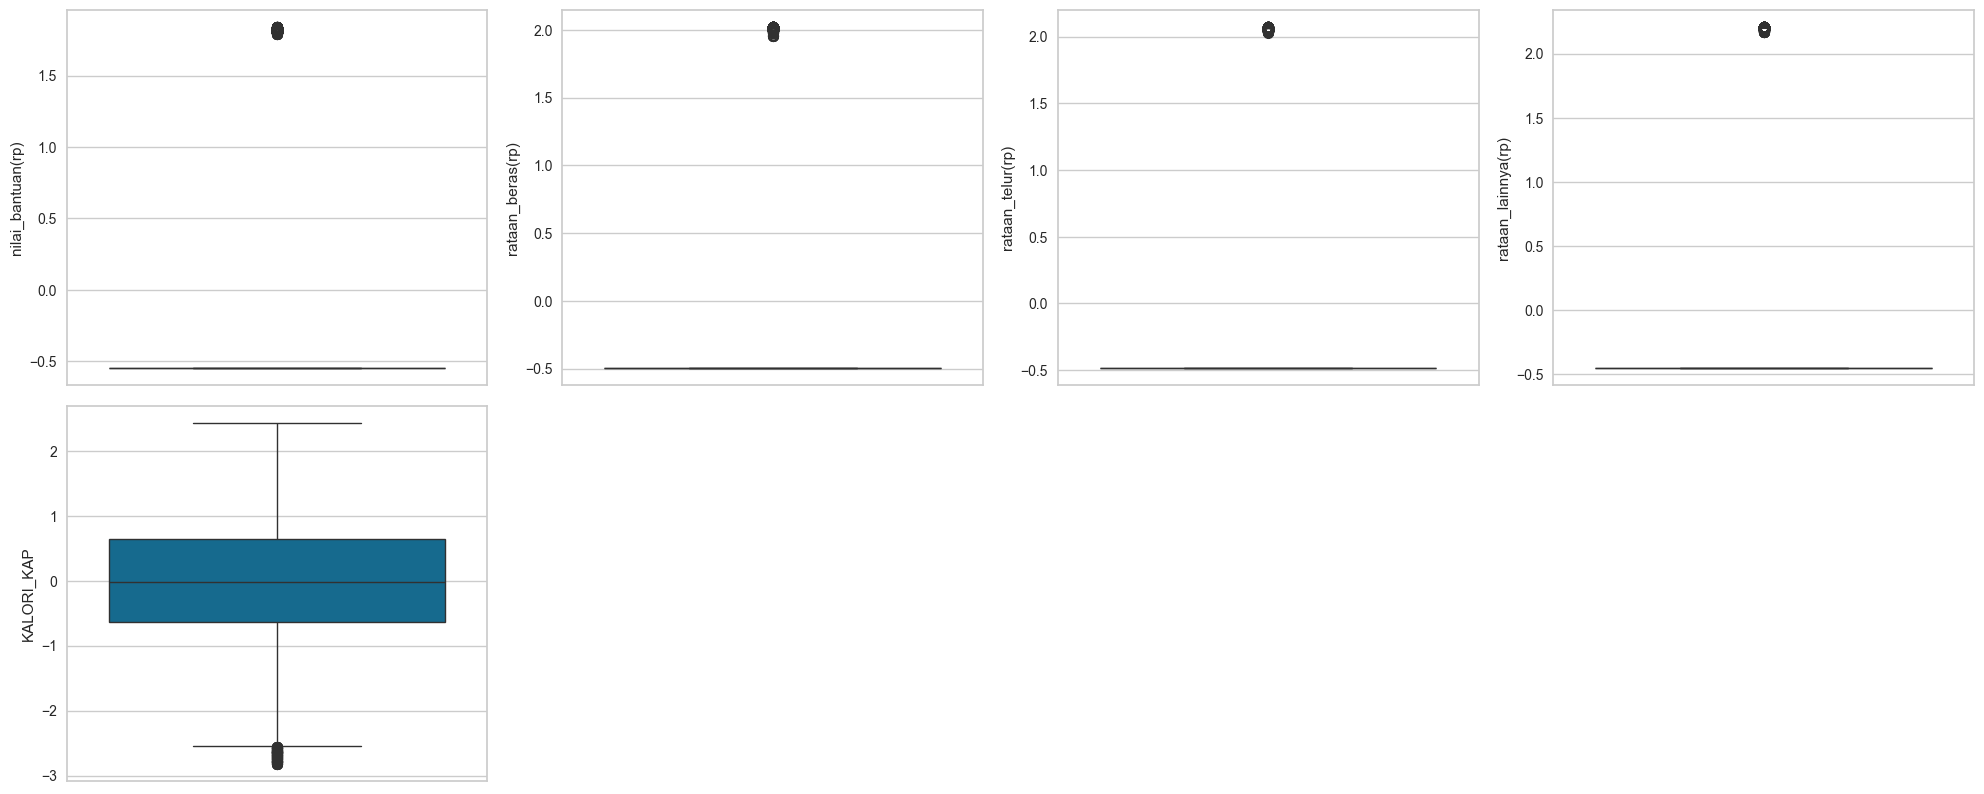

In [8]:
# Boxplot sebelum handling outlier
       
plt.figure(figsize=(20,16))
for i in range(len(cols)):
    plt.subplot(4, 4, i+1)
    sns.boxplot(y = df_model[cols[i]], orient = 'v')
    plt.tight_layout()

In [9]:
# Handling outlier dengan z-score
cols = ['nilai_bantuan(rp)', 'rataan_beras(rp)', 'rataan_telur(rp)', 'rataan_lainnya(rp)', 'KALORI_KAP']

rows_before_filt = len(df_model)
print('Jumlah Baris sebelum filter:', rows_before_filt, '\n')


filtered_entries = np.array([True] * len(df_model))

for col in cols:
    zscore = abs(stats.zscore(df_model[col]))                       # hitung absolute z-scorenya
    filtered_entries = (zscore < 2.5) & filtered_entries        # keep yang kurang dari 2.5 absolute z-scorenya
    
df_model = df_model[filtered_entries]                                    

# Total baris yang dibuang
rows_after_filt = len(df_model)
diff = round((rows_before_filt - rows_after_filt) / rows_before_filt * 100, 2)
print(f'Jumlah baris setelah memfilter outlier: {len(df_model)}')
print(f'Persentase outlier yang dibuang:', diff)

Jumlah Baris sebelum filter: 25890 

Jumlah baris setelah memfilter outlier: 25701
Persentase outlier yang dibuang: 0.73


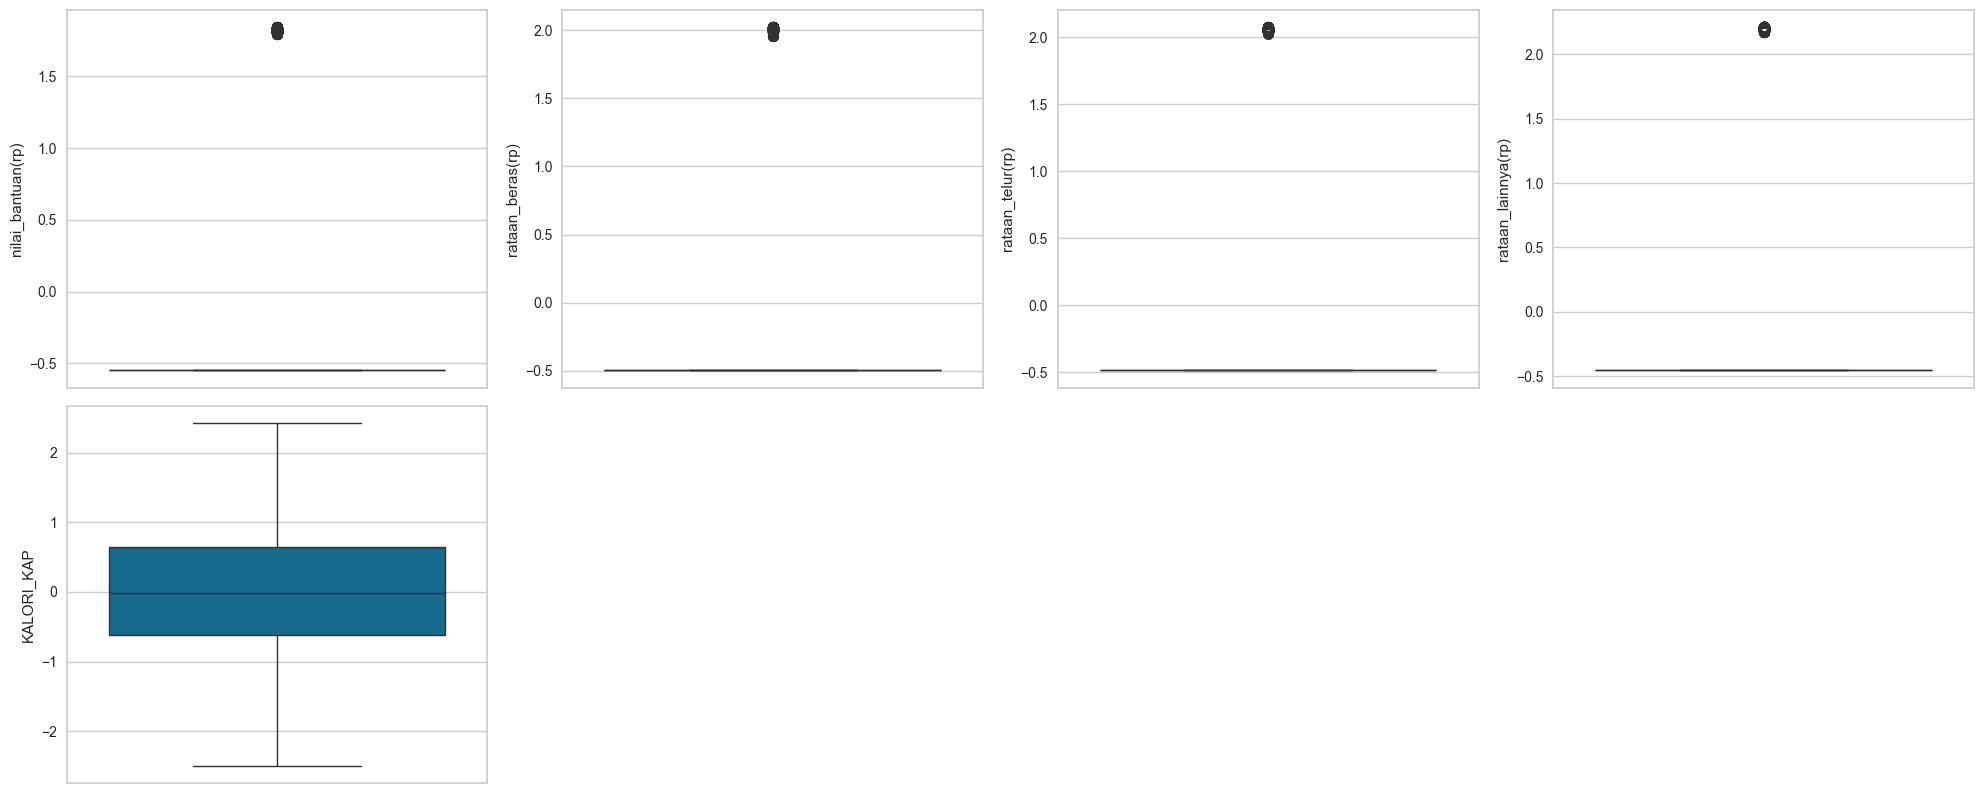

In [10]:
# Boxplot setelah handling outlier

plt.figure(figsize=(20,16))
for i in range(len(cols)):
    plt.subplot(4, 4, i+1)
    sns.boxplot(y = df_model[cols[i]], orient = 'v')
    plt.tight_layout()

In [11]:
df_model.columns

Index(['R105', 'KALORI_KAP', 'PROTE_KAP', 'LEMAK_KAP', 'KARBO_KAP',
       'FOOD_LABEL', 'Pengeluaran_Jenis_A', 'Pengeluaran_Jenis_B',
       'Pengeluaran_Jenis_C', 'Pengeluaran_Jenis_D', 'Pengeluaran_Jenis_E',
       'Pengeluaran_Jenis_F', 'Pengeluaran_Jenis_G', 'Pengeluaran_Jenis_H',
       'Pengeluaran_Jenis_I', 'Pengeluaran_Jenis_J', 'Pengeluaran_Jenis_K',
       'Pengeluaran_Jenis_L', 'Pengeluaran_Jenis_M', 'Pengeluaran_Jenis_N',
       'R2208A2', 'R2208A3', 'R2208A4', 'R2208A5', 'nilai_bantuan(rp)',
       'rataan_beras(rp)', 'rataan_telur(rp)', 'rataan_lainnya(rp)'],
      dtype='object')

In [13]:
X = df_model.drop(['FOOD_LABEL', 'PROTE_KAP', 'LEMAK_KAP', 'KARBO_KAP'], axis=1)
y = df_model['FOOD_LABEL']

# SMOTE terbaik dengan ratio=1
sm = SMOTE(random_state=86, sampling_strategy=1)
X, y = sm.fit_resample(X, y)

X_ori = X.copy()
y_ori = y.copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=7767, shuffle=True, stratify=y, random_state=1)

# X_train, X_test, y_train, y_test = train_test_split(X,
#                                                    y,
#                                                    test_size=0.3,
#                                                    shuffle=True,
#                                                    stratify=y,
#                                                    random_state=42)

In [14]:
print(X_train.shape)
print(X_test.shape)

(38341, 24)
(7767, 24)


# Pemodelan Skenario 1

In [15]:
def eval_model_holdout(model, xtrain, ytrain, xtest, ytest, plot=False):
    model.fit(xtrain, ytrain)
    y_pred_train = model.predict(xtrain)
    y_pred_test = model.predict(xtest)
    
    cm_test = confusion_matrix(ytest, y_pred_test)
    tn, fp, fn, tp = cm_test.ravel()
    sensitivity = tp / (tp + fn) 
    specificity = tn / (tn + fp) 

    print("Holdout Evaluation (Train):")
    print("Balanced Accuracy:", round(balanced_accuracy_score(ytrain, y_pred_train), 2))
    print("F1 Score:", round(f1_score(ytrain, y_pred_train), 2))
    print("Kappa:", round(cohen_kappa_score(ytrain, y_pred_train), 2))

    print("\nHoldout Evaluation (Test):")
    print("Balanced Accuracy:", round(balanced_accuracy_score(ytest, y_pred_test), 2))
    print("F1 Score:", round(f1_score(ytest, y_pred_test), 2))
    print("Kappa:", round(cohen_kappa_score(ytest, y_pred_test), 2))
    print("Sensitivity (Recall):", round(sensitivity, 2))
    print("Specificity:", round(specificity, 2))

    if plot:
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues',
                    xticklabels=['Tidak Miskin', 'Miskin'], yticklabels=['Tidak Miskin', 'Miskin'])
        plt.title('Confusion Matrix Testing Data')
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.show()

In [16]:
cv = KFold(n_splits=10, shuffle=True, random_state=86)

def specificity_score(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()
    return tn / (tn + fp)

specificity_scorer = make_scorer(specificity_score)
sensitivity_scorer = make_scorer(recall_score)

def eval_model_CV(model, X, y):    
    cv_results = cross_validate(
        model, X, y, cv=cv, 
        scoring={
            'balanced_accuracy': 'balanced_accuracy',
            'f1': 'f1',
            'kappa': make_scorer(cohen_kappa_score),
            'sensitivity': sensitivity_scorer,
            'specificity': specificity_scorer
        },
        return_train_score=False
    )

    balanced_acc_scores = cv_results['test_balanced_accuracy']
    f1_scores = cv_results['test_f1']
    kappa_scores = cv_results['test_kappa']
    sensitivity_scores = cv_results['test_sensitivity']
    specificity_scores = cv_results['test_specificity']
    
    mean_bal_acc = round(np.mean(balanced_acc_scores), 2)
    mean_f1 = round(np.mean(f1_scores), 2)
    mean_kappa = round(np.mean(kappa_scores), 2)
    mean_sensitivity = round(np.mean(sensitivity_scores), 2)
    mean_specificity = round(np.mean(specificity_scores), 2)
    
    print('Mean Bal Acc (Test)  :', mean_bal_acc)
    print('Mean F1 Score (Test) :', mean_f1)
    print('Mean Kappa (Test)    :', mean_kappa)
    print('Mean Sensitivity (Test):', mean_sensitivity)
    print('Mean Specificity (Test):', mean_specificity)

In [17]:
def mergeXy_for_CV(X1, X2, y_train, y_test):
    merge_X = pd.concat([X1, X2], ignore_index=True)
    merge_y = y_train.tolist() + y_test.tolist()
    return merge_X, merge_y

## Baseline Model 

In [18]:
rf_model = RandomForestClassifier(n_estimators=350, random_state=86, max_depth=10, min_samples_split=2, min_samples_leaf=2)
xgb_model = XGBClassifier(random_state=86, eval_metric='logloss', learning_rate=0.01, max_depth=10, n_estimators=350)

Holdout Evaluation (Train):
Balanced Accuracy: 0.88
F1 Score: 0.88
Kappa: 0.76

Holdout Evaluation (Test):
Balanced Accuracy: 0.86
F1 Score: 0.86
Kappa: 0.72
Sensitivity (Recall): 0.89
Specificity: 0.83


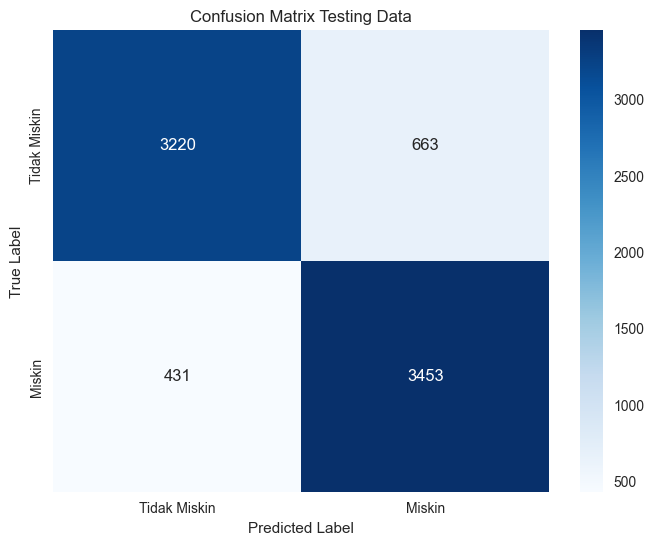

In [ ]:
stacking_ensemble = StackingClassifier(
    estimators=[('rf', rf_model), ('xgb', xgb_model)],
    final_estimator=LogisticRegression(random_state=86)
)
eval_model_holdout(stacking_ensemble, X_train, y_train, X_test, y_test, plot=True)

In [20]:
eval_model_CV(stacking_ensemble, X, y)

Mean Bal Acc (Test)  : 0.85
Mean F1 Score (Test) : 0.86
Mean Kappa (Test)    : 0.71
Mean Sensitivity (Test): 0.88
Mean Specificity (Test): 0.83


## Seleksi Fitur - RFE

In [44]:
X_train_v3, X_test_v3, y_train_v3, y_test_v3 = X_train.copy(), X_test.copy(), y_train.copy(), y_test.copy()

In [ ]:
bal_acc_list = []
f1_score_list = []
kappa_list = []
k_list = []

for k in range(1, 21):
    RFE_rf = RFE(estimator=rf_model, n_features_to_select=k, step=1)
    RFE_rf.fit(X_train_v3, y_train_v3)
    sel_X_train_rf = RFE_rf.transform(X_train_v3)
    sel_X_test_rf = RFE_rf.transform(X_test_v3)
 
    RFE_xgb = RFE(estimator=xgb_model, n_features_to_select=k, step=1)
    RFE_xgb.fit(X_train_v3, y_train_v3)
    sel_X_train_xgb = RFE_xgb.transform(X_train_v3)
    sel_X_test_xgb = RFE_xgb.transform(X_test_v3)

    sel_X_train_v3 = np.concatenate([sel_X_train_rf, sel_X_train_xgb], axis=1)
    sel_X_test_v3 = np.concatenate([sel_X_test_rf, sel_X_test_xgb], axis=1)
    
    stacking_ensemble.fit(sel_X_train_v3, y_train_v3)
    RFE_preds = stacking_ensemble.predict(sel_X_test_v3)

    bal_acc_kbest = round(balanced_accuracy_score(y_test_v3, RFE_preds), 2)
    f1_score_kbest = round(f1_score(y_test_v3, RFE_preds), 2)
    kappa_kbest = round(cohen_kappa_score(y_test_v3, RFE_preds), 2)
    
    bal_acc_list.append(bal_acc_kbest)
    f1_score_list.append(f1_score_kbest)
    kappa_list.append(kappa_kbest)
    k_list.append(k)

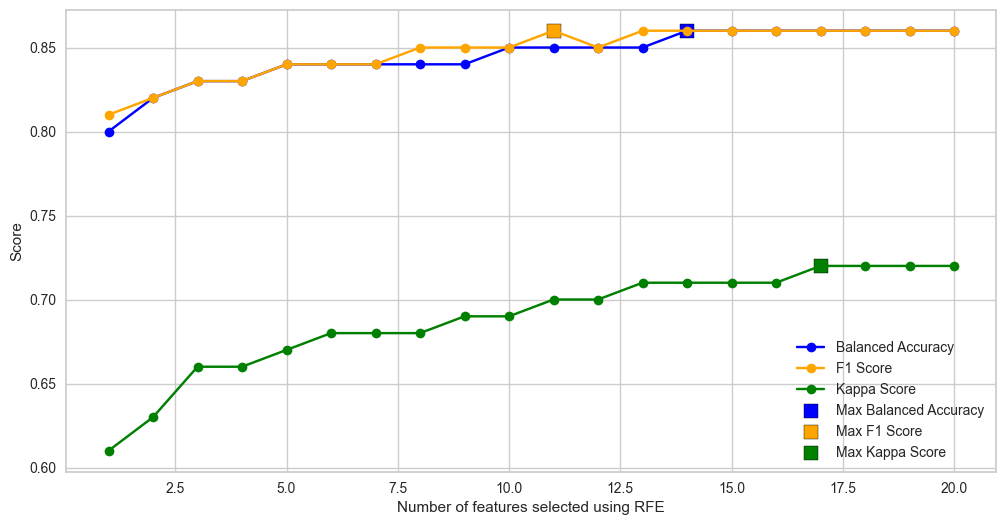

In [ ]:
# Plotting the results
plt.figure(figsize=(12, 6))

plt.plot(k_list, bal_acc_list, marker='o', label='Balanced Accuracy', color='blue')
plt.plot(k_list, f1_score_list, marker='o', label='F1 Score', color='orange')
plt.plot(k_list, kappa_list, marker='o', label='Kappa Score', color='green')

max_bal_acc = np.max(bal_acc_list)
max_f1 = np.max(f1_score_list)
max_kappa = np.max(kappa_list)

plt.scatter(np.argmax(bal_acc_list) + 1, max_bal_acc, color='blue', s=100, edgecolor='black', label='Max Balanced Accuracy', marker='s')
plt.scatter(np.argmax(f1_score_list) + 1, max_f1, color='orange', s=100, edgecolor='black', label='Max F1 Score', marker='s')
plt.scatter(np.argmax(kappa_list) + 1, max_kappa, color='green', s=100, edgecolor='black', label='Max Kappa Score', marker='s')
plt.xlabel('Number of features selected using RFE')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
print('Max Bal Acc:', max_bal_acc)
print('Max F1 score:', max_f1)
print('Max kappa:', max_kappa)

Max Bal Acc: 0.86
Max F1 score: 0.86
Max kappa: 0.72


In [ ]:
best_k_using_bal_acc = np.argmax(bal_acc_list) + 1
best_k_using_bal_acc

14

In [ ]:
# Final RFE selection dengan jumlah fitur terbaik untuk masing-masing model
RFE_rf_final = RFE(estimator=rf_model, n_features_to_select=best_k_using_bal_acc, step=1)
RFE_xgb_final = RFE(estimator=xgb_model, n_features_to_select=best_k_using_bal_acc, step=1)
RFE_rf_final.fit(X_train_v3, y_train_v3)
RFE_xgb_final.fit(X_train_v3, y_train_v3)

selected_features_mask_rf = RFE_rf_final.get_support()
selected_features_mask_xgb = RFE_xgb_final.get_support()
selected_features_rf = X_train_v3.columns[selected_features_mask_rf]
selected_features_xgb = X_train_v3.columns[selected_features_mask_xgb]
selected_features_combined = selected_features_rf.union(selected_features_xgb)

# Jika gabungan fitur melebihi jumlah best_k_using_bal_acc, pilih hanya best_k_using_bal_acc fitur
if len(selected_features_combined) > best_k_using_bal_acc:
    all_selected_features = list(selected_features_rf) + list(selected_features_xgb)
    feature_counts = pd.Series(all_selected_features).value_counts()
    selected_features_combined = feature_counts.nlargest(best_k_using_bal_acc).index.tolist()
sel_X_train_final = X_train_v3[selected_features_combined]
sel_X_test_final = X_test_v3[selected_features_combined]

print("Fitur terpilih untuk model stacking:", selected_features_combined)
print("Jumlah fitur terpilih:", len(selected_features_combined))

Fitur terpilih untuk model stacking: ['R105', 'Pengeluaran_Jenis_F', 'nilai_bantuan(rp)', 'KALORI_KAP', 'Pengeluaran_Jenis_H', 'Pengeluaran_Jenis_N', 'Pengeluaran_Jenis_E', 'Pengeluaran_Jenis_D', 'Pengeluaran_Jenis_B', 'Pengeluaran_Jenis_A', 'Pengeluaran_Jenis_L', 'rataan_beras(rp)', 'rataan_telur(rp)', 'rataan_lainnya(rp)']
Jumlah fitur terpilih: 14


Holdout Evaluation (Train):
Balanced Accuracy: 0.87
F1 Score: 0.87
Kappa: 0.74

Holdout Evaluation (Test):
Balanced Accuracy: 0.85
F1 Score: 0.86
Kappa: 0.71
Sensitivity (Recall): 0.88
Specificity: 0.83


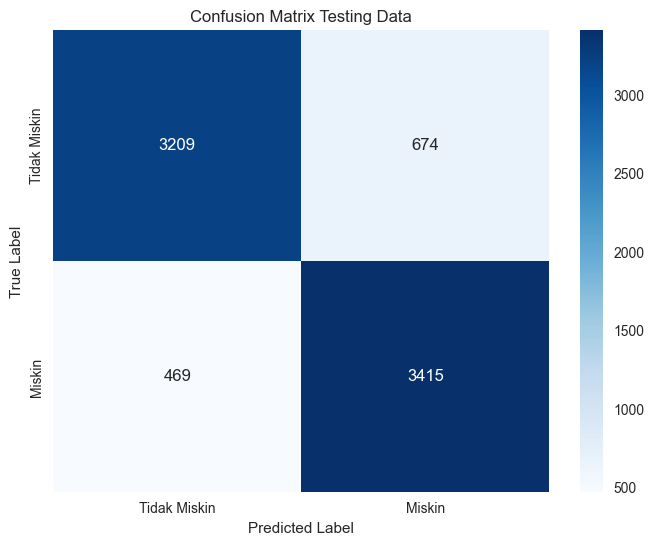

In [50]:
sel_X_train_final = X_train_v3[selected_features_combined]
sel_X_test_final = X_test_v3[selected_features_combined]
eval_model_holdout(stacking_ensemble, sel_X_train_final, y_train_v3, sel_X_test_final, y_test_v3, plot=True)

In [28]:
eval_model_CV(stacking_ensemble, X_ori[selected_features_combined], y_ori)

Mean Bal Acc (Test)  : 0.85
Mean F1 Score (Test) : 0.85
Mean Kappa (Test)    : 0.7
Mean Sensitivity (Test): 0.87
Mean Specificity (Test): 0.82


## Seleksi Fitur - MI

In [21]:
X_train_v1, X_test_v1, y_train_v1, y_test_v1 = X_train.copy(), X_test.copy(), y_train.copy(), y_test.copy()

In [ ]:
bal_acc_list = []
f1_score_list = []
kappa_list = []
k_list = []

for k in range(1, 21): 
    # Mutual Information untuk Random Forest
    selector_rf = SelectKBest(score_func=mutual_info_classif, k=k)
    sel_X_train_rf = selector_rf.fit_transform(X_train_v1, y_train_v1)
    sel_X_test_rf = selector_rf.transform(X_test_v1)

    # Mutual Information untuk XGBoost
    selector_xgb = SelectKBest(score_func=mutual_info_classif, k=k)
    sel_X_train_xgb = selector_xgb.fit_transform(X_train_v1, y_train_v1)
    sel_X_test_xgb = selector_xgb.transform(X_test_v1)
    
    sel_X_train_v1 = np.concatenate([sel_X_train_rf, sel_X_train_xgb], axis=1)
    sel_X_test_v1 = np.concatenate([sel_X_test_rf, sel_X_test_xgb], axis=1)
    stacking_ensemble.fit(sel_X_train_v1, y_train_v1)
    mi_preds = stacking_ensemble.predict(sel_X_test_v1)

    bal_acc_kbest = round(balanced_accuracy_score(y_test_v1, mi_preds), 2)
    f1_score_kbest = round(f1_score(y_test_v1, mi_preds), 2)
    kappa_kbest = round(cohen_kappa_score(y_test_v1, mi_preds), 2)

    bal_acc_list.append(bal_acc_kbest)
    f1_score_list.append(f1_score_kbest)
    kappa_list.append(kappa_kbest)
    k_list.append(k)

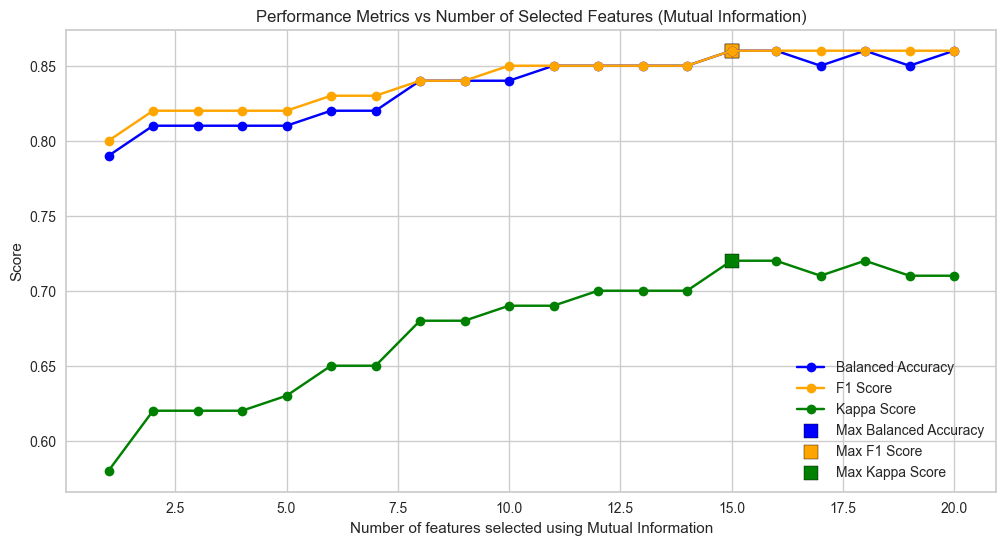

In [ ]:
plt.figure(figsize=(12, 6))

plt.plot(k_list, bal_acc_list, marker='o', label='Balanced Accuracy', color='blue')
plt.plot(k_list, f1_score_list, marker='o', label='F1 Score', color='orange')
plt.plot(k_list, kappa_list, marker='o', label='Kappa Score', color='green')

max_bal_acc = np.max(bal_acc_list)
max_f1 = np.max(f1_score_list)
max_kappa = np.max(kappa_list)

max_bal_acc_idx = np.argmax(bal_acc_list)
max_f1_idx = np.argmax(f1_score_list)
max_kappa_idx = np.argmax(kappa_list)

plt.scatter(k_list[max_bal_acc_idx], max_bal_acc, color='blue', s=100, edgecolor='black', label='Max Balanced Accuracy', marker='s')
plt.scatter(k_list[max_f1_idx], max_f1, color='orange', s=100, edgecolor='black', label='Max F1 Score', marker='s')
plt.scatter(k_list[max_kappa_idx], max_kappa, color='green', s=100, edgecolor='black', label='Max Kappa Score', marker='s')
plt.xlabel('Number of features selected using Mutual Information')
plt.ylabel('Score')
plt.title('Performance Metrics vs Number of Selected Features (Mutual Information)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
print('Max Bal Acc:', max_bal_acc)
print('Max F1 score:', max_f1)
print('Max kappa:', max_kappa)

Max Bal Acc: 0.86
Max F1 score: 0.86
Max kappa: 0.72


In [ ]:
best_k_using_bal_acc = np.argmax(bal_acc_list) + 1
best_k_using_bal_acc

15

In [ ]:
best_k_using_bal_acc = np.argmax(bal_acc_list) + 1 

selector_rf = SelectKBest(score_func=mutual_info_classif, k=best_k_using_bal_acc)
sel_X_train_rf = selector_rf.fit_transform(X_train_v1, y_train_v1)  
sel_X_test_rf = selector_rf.transform(X_test_v1)  
selected_features_rf = X_train_v1.columns[selector_rf.get_support()]  # Fitur terpilih RF

selector_xgb = SelectKBest(score_func=mutual_info_classif, k=best_k_using_bal_acc)
sel_X_train_xgb = selector_xgb.fit_transform(X_train_v1, y_train_v1)  
sel_X_test_xgb = selector_xgb.transform(X_test_v1)  
selected_features_xgb = X_train_v1.columns[selector_xgb.get_support()]  # Fitur terpilih XGB

selected_features_combined = list(set(selected_features_rf).union(set(selected_features_xgb)))
if len(selected_features_combined) > best_k_using_bal_acc:
    all_selected_features = list(selected_features_rf) + list(selected_features_xgb)
    feature_counts = pd.Series(all_selected_features).value_counts()
    selected_features_combined = feature_counts.nlargest(best_k_using_bal_acc).index.tolist()

# Seleksi data latih dan data uji berdasarkan fitur gabungan yang telah dipilih
sel_X_train_final = X_train_v1[selected_features_combined]
sel_X_test_final = X_test_v1[selected_features_combined]
print("Fitur terpilih untuk model stacking:", selected_features_combined)
print("Jumlah fitur terpilih:", len(selected_features_combined))


Fitur terpilih untuk model stacking: ['KALORI_KAP', 'Pengeluaran_Jenis_J', 'rataan_lainnya(rp)', 'rataan_telur(rp)', 'rataan_beras(rp)', 'nilai_bantuan(rp)', 'Pengeluaran_Jenis_L', 'Pengeluaran_Jenis_N', 'Pengeluaran_Jenis_H', 'Pengeluaran_Jenis_D', 'Pengeluaran_Jenis_G', 'Pengeluaran_Jenis_A', 'Pengeluaran_Jenis_E', 'Pengeluaran_Jenis_C', 'Pengeluaran_Jenis_B']
Jumlah fitur terpilih: 15


Holdout Evaluation (Train):
Balanced Accuracy: 0.87
F1 Score: 0.87
Kappa: 0.74

Holdout Evaluation (Test):
Balanced Accuracy: 0.85
F1 Score: 0.86
Kappa: 0.71
Sensitivity (Recall): 0.88
Specificity: 0.83


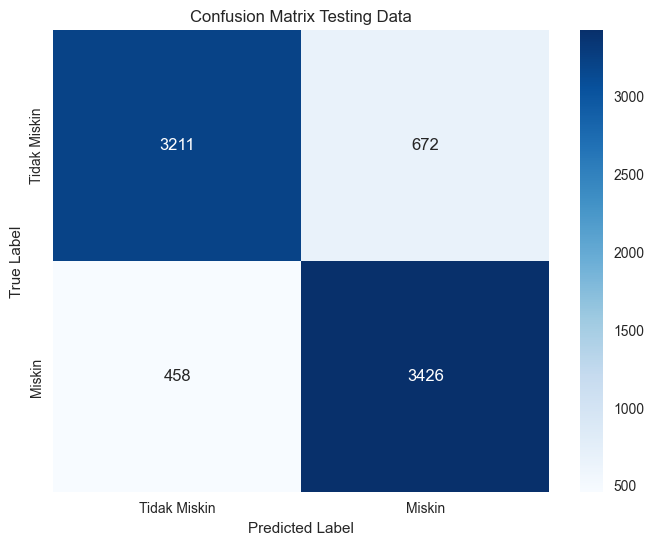

In [40]:
sel_X_train_final = X_train_v1[selected_features_combined]
sel_X_test_final = X_test_v1[selected_features_combined]
eval_model_holdout(stacking_ensemble, sel_X_train_final, y_train_v1, sel_X_test_final, y_test_v1, plot=True)

In [41]:
eval_model_CV(stacking_ensemble, X_ori[selected_features_combined], y_ori)

Mean Bal Acc (Test)  : 0.85
Mean F1 Score (Test) : 0.85
Mean Kappa (Test)    : 0.7
Mean Sensitivity (Test): 0.87
Mean Specificity (Test): 0.82


## Seleksi Fitur - PSO

Kita skip ya karena ribet dan lama

## Simpulan

Karena hasil dari RFE 14 fitur dan MI 15 fitur menghasilkan nilai yang relatif sama, maka akn dinilai efisiensi waktu dalam memproses data dimana RFE lebih efisien. Sehingga kita dapat simpulkan bahwa RFE lebih baik

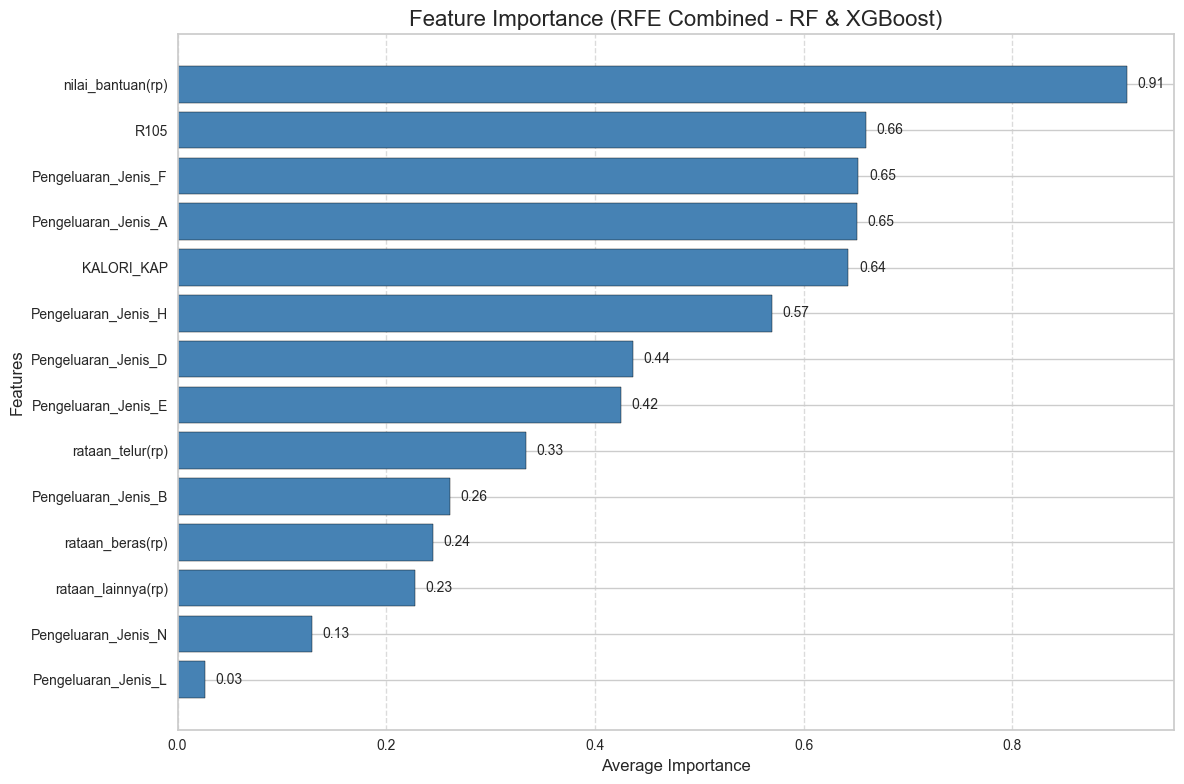

In [51]:
# Running ulang RFE dahulu
rf_importances = np.random.rand(len(selected_features_rf))  
xgb_importances = np.random.rand(len(selected_features_xgb)) 

combined_importances = pd.DataFrame({
    'Feature': list(selected_features_combined),
    'RF Importance': [rf_importances[selected_features_rf.get_loc(feat)] if feat in selected_features_rf else 0 for feat in selected_features_combined],
    'XGB Importance': [xgb_importances[selected_features_xgb.get_loc(feat)] if feat in selected_features_xgb else 0 for feat in selected_features_combined]
})

combined_importances['Average Importance'] = combined_importances[['RF Importance', 'XGB Importance']].mean(axis=1)
combined_importances = combined_importances.sort_values(by='Average Importance', ascending=False)

plt.figure(figsize=(12, 8))
plt.barh(combined_importances['Feature'], combined_importances['Average Importance'], color='steelblue', edgecolor='black')
plt.xlabel('Average Importance', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title('Feature Importance (RFE Combined - RF & XGBoost)', fontsize=16)
plt.gca().invert_yaxis() 
plt.grid(axis='x', linestyle='--', alpha=0.7)
for i, val in enumerate(combined_importances['Average Importance']):
    plt.text(val + 0.01, i, f'{val:.2f}', va='center', fontsize=10)
plt.tight_layout()
plt.show()

# Pemodelan Skenario 2

In [53]:
X = df_model.drop(['FOOD_LABEL', 'PROTE_KAP', 'LEMAK_KAP', 'KARBO_KAP'], axis=1)
y = df_model['FOOD_LABEL']

undersampler = RandomUnderSampler(random_state=86)
X_under, y_under = undersampler.fit_resample(X, y)

X_ori = X.copy()
y_ori = y.copy()

X_train, X_test, y_train, y_test = train_test_split(
    X_under, y_under,
    test_size=0.3, 
    shuffle=True, 
    stratify=y_under, 
    random_state=86
)

In [54]:
print(X_train.shape)
print(X_test.shape)

(3705, 24)
(1589, 24)


In [55]:
def eval_model_holdout(model, xtrain, ytrain, xtest, ytest, plot=False):
    model.fit(xtrain, ytrain)
    y_pred_train = model.predict(xtrain)
    y_pred_test = model.predict(xtest)
    
    cm_test = confusion_matrix(ytest, y_pred_test)
    tn, fp, fn, tp = cm_test.ravel()
    sensitivity = tp / (tp + fn) 
    specificity = tn / (tn + fp) 

    print("Holdout Evaluation (Train):")
    print("Balanced Accuracy:", round(balanced_accuracy_score(ytrain, y_pred_train), 2))
    print("F1 Score:", round(f1_score(ytrain, y_pred_train), 2))
    print("Kappa:", round(cohen_kappa_score(ytrain, y_pred_train), 2))

    print("\nHoldout Evaluation (Test):")
    print("Balanced Accuracy:", round(balanced_accuracy_score(ytest, y_pred_test), 2))
    print("F1 Score:", round(f1_score(ytest, y_pred_test), 2))
    print("Kappa:", round(cohen_kappa_score(ytest, y_pred_test), 2))
    print("Sensitivity (Recall):", round(sensitivity, 2))
    print("Specificity:", round(specificity, 2))

    if plot:
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues',
                    xticklabels=['Tidak Miskin', 'Miskin'], yticklabels=['Tidak Miskin', 'Miskin'])
        plt.title('Confusion Matrix Testing Data')
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.show()

In [56]:
cv = KFold(n_splits=10, shuffle=True, random_state=86)

def specificity_score(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()
    return tn / (tn + fp)

specificity_scorer = make_scorer(specificity_score)
sensitivity_scorer = make_scorer(recall_score)

def eval_model_CV(model, X, y):    
    cv_results = cross_validate(
        model, X, y, cv=cv, 
        scoring={
            'balanced_accuracy': 'balanced_accuracy',
            'f1': 'f1',
            'kappa': make_scorer(cohen_kappa_score),
            'sensitivity': sensitivity_scorer,
            'specificity': specificity_scorer
        },
        return_train_score=False
    )

    balanced_acc_scores = cv_results['test_balanced_accuracy']
    f1_scores = cv_results['test_f1']
    kappa_scores = cv_results['test_kappa']
    sensitivity_scores = cv_results['test_sensitivity']
    specificity_scores = cv_results['test_specificity']
    
    mean_bal_acc = round(np.mean(balanced_acc_scores), 2)
    mean_f1 = round(np.mean(f1_scores), 2)
    mean_kappa = round(np.mean(kappa_scores), 2)
    mean_sensitivity = round(np.mean(sensitivity_scores), 2)
    mean_specificity = round(np.mean(specificity_scores), 2)
    
    print('Mean Bal Acc (Test)  :', mean_bal_acc)
    print('Mean F1 Score (Test) :', mean_f1)
    print('Mean Kappa (Test)    :', mean_kappa)
    print('Mean Sensitivity (Test):', mean_sensitivity)
    print('Mean Specificity (Test):', mean_specificity)

In [57]:
def mergeXy_for_CV(X1, X2, y_train, y_test):
    merge_X = pd.concat([X1, X2], ignore_index=True)
    merge_y = y_train.tolist() + y_test.tolist()
    return merge_X, merge_y

## Baseline Model

In [58]:
rf_model = RandomForestClassifier(n_estimators=350, random_state=86, max_depth=10, min_samples_split=2, min_samples_leaf=2)
xgb_model = XGBClassifier(random_state=86, eval_metric='logloss', learning_rate=0.01, max_depth=10, n_estimators=350)

Holdout Evaluation (Train):
Balanced Accuracy: 0.86
F1 Score: 0.87
Kappa: 0.73

Holdout Evaluation (Test):
Balanced Accuracy: 0.81
F1 Score: 0.82
Kappa: 0.62
Sensitivity (Recall): 0.84
Specificity: 0.78


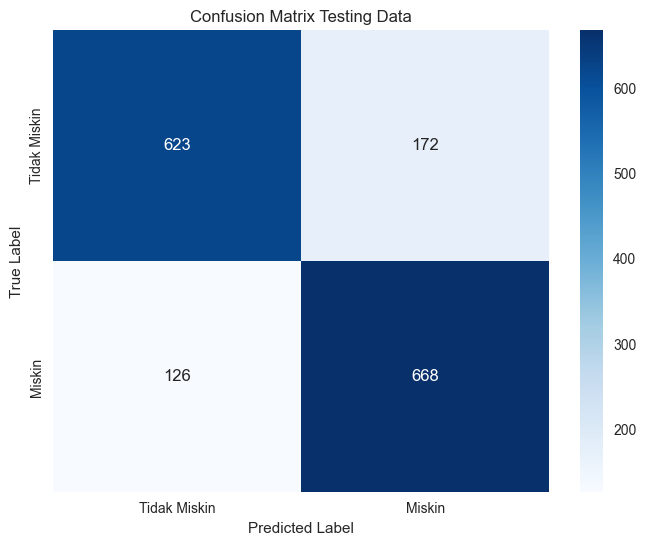

In [59]:
# Define Stacking Ensemble
stacking_ensemble = StackingClassifier(
    estimators=[('rf', rf_model), ('xgb', xgb_model)],
    final_estimator=LogisticRegression(random_state=86)
)
eval_model_holdout(stacking_ensemble, X_train, y_train, X_test, y_test, plot=True)

In [60]:
eval_model_CV(stacking_ensemble, X, y)

Mean Bal Acc (Test)  : 0.65
Mean F1 Score (Test) : 0.42
Mean Kappa (Test)    : 0.38
Mean Sensitivity (Test): 0.32
Mean Specificity (Test): 0.98


## Seleksi Fitur - RFE

In [78]:
X_train_v3, X_test_v3, y_train_v3, y_test_v3 = X_train.copy(), X_test.copy(), y_train.copy(), y_test.copy()

In [79]:
# Lists to store evaluation metrics
bal_acc_list = []
f1_score_list = []
kappa_list = []
k_list = []

for k in range(1, 21):
    RFE_rf = RFE(estimator=rf_model, n_features_to_select=k, step=1)
    RFE_rf.fit(X_train_v3, y_train_v3)
    sel_X_train_rf = RFE_rf.transform(X_train_v3)
    sel_X_test_rf = RFE_rf.transform(X_test_v3)
 
    RFE_xgb = RFE(estimator=xgb_model, n_features_to_select=k, step=1)
    RFE_xgb.fit(X_train_v3, y_train_v3)
    sel_X_train_xgb = RFE_xgb.transform(X_train_v3)
    sel_X_test_xgb = RFE_xgb.transform(X_test_v3)

    sel_X_train_v3 = np.concatenate([sel_X_train_rf, sel_X_train_xgb], axis=1)
    sel_X_test_v3 = np.concatenate([sel_X_test_rf, sel_X_test_xgb], axis=1)
    
    stacking_ensemble.fit(sel_X_train_v3, y_train_v3)
    RFE_preds = stacking_ensemble.predict(sel_X_test_v3)

    bal_acc_kbest = round(balanced_accuracy_score(y_test_v3, RFE_preds), 2)
    f1_score_kbest = round(f1_score(y_test_v3, RFE_preds), 2)
    kappa_kbest = round(cohen_kappa_score(y_test_v3, RFE_preds), 2)
    
    bal_acc_list.append(bal_acc_kbest)
    f1_score_list.append(f1_score_kbest)
    kappa_list.append(kappa_kbest)
    k_list.append(k)

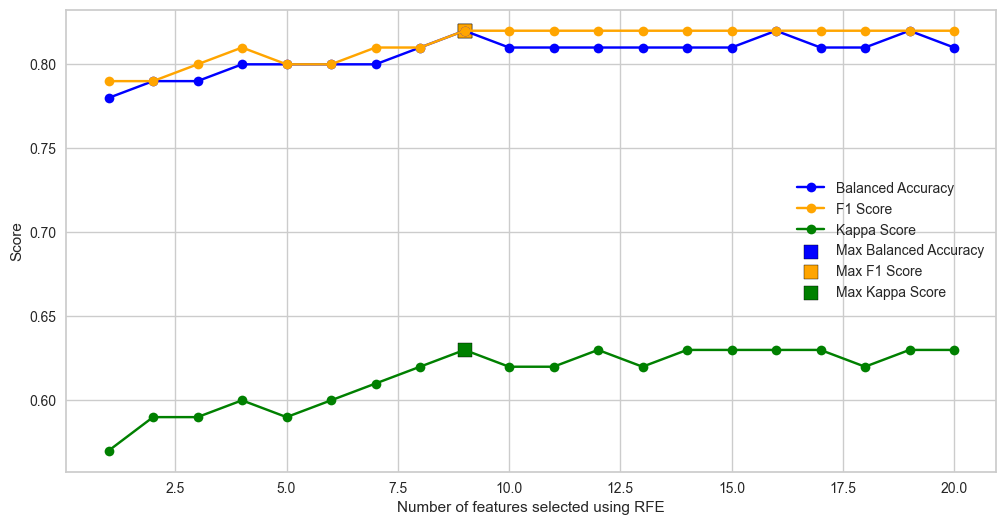

In [80]:
# Plotting the results
plt.figure(figsize=(12, 6))

# Plot each metric
plt.plot(k_list, bal_acc_list, marker='o', label='Balanced Accuracy', color='blue')
plt.plot(k_list, f1_score_list, marker='o', label='F1 Score', color='orange')
plt.plot(k_list, kappa_list, marker='o', label='Kappa Score', color='green')

# Mark maximum values
max_bal_acc = np.max(bal_acc_list)
max_f1 = np.max(f1_score_list)
max_kappa = np.max(kappa_list)

# Display max values
plt.scatter(np.argmax(bal_acc_list) + 1, max_bal_acc, color='blue', s=100, edgecolor='black', label='Max Balanced Accuracy', marker='s')
plt.scatter(np.argmax(f1_score_list) + 1, max_f1, color='orange', s=100, edgecolor='black', label='Max F1 Score', marker='s')
plt.scatter(np.argmax(kappa_list) + 1, max_kappa, color='green', s=100, edgecolor='black', label='Max Kappa Score', marker='s')

# Add labels and title
plt.xlabel('Number of features selected using RFE')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()

In [81]:
# Print maximum scores
print('Max Bal Acc:', max_bal_acc)
print('Max F1 score:', max_f1)
print('Max kappa:', max_kappa)

Max Bal Acc: 0.82
Max F1 score: 0.82
Max kappa: 0.63


In [82]:
# Determine best k based on balanced accuracy
best_k_using_bal_acc = np.argmax(bal_acc_list) + 1
best_k_using_bal_acc

9

In [83]:
# Final RFE selection dengan jumlah fitur terbaik untuk masing-masing model
RFE_rf_final = RFE(estimator=rf_model, n_features_to_select=best_k_using_bal_acc, step=1)
RFE_xgb_final = RFE(estimator=xgb_model, n_features_to_select=best_k_using_bal_acc, step=1)

RFE_rf_final.fit(X_train_v3, y_train_v3)
RFE_xgb_final.fit(X_train_v3, y_train_v3)

# Mendapatkan mask fitur yang dipilih oleh RFE untuk masing-masing model
selected_features_mask_rf = RFE_rf_final.get_support()
selected_features_mask_xgb = RFE_xgb_final.get_support()

# Mendapatkan nama fitur yang terpilih dari Random Forest dan XGBoost
selected_features_rf = X_train_v3.columns[selected_features_mask_rf]
selected_features_xgb = X_train_v3.columns[selected_features_mask_xgb]

# Menggabungkan fitur tanpa duplikasi
selected_features_combined = selected_features_rf.union(selected_features_xgb)

# Jika gabungan fitur melebihi jumlah best_k_using_bal_acc, pilih hanya best_k_using_bal_acc fitur
if len(selected_features_combined) > best_k_using_bal_acc:
    # Menghitung frekuensi kemunculan fitur yang terpilih di antara kedua model
    all_selected_features = list(selected_features_rf) + list(selected_features_xgb)
    feature_counts = pd.Series(all_selected_features).value_counts()

    # Memilih hanya `best_k_using_bal_acc` fitur yang paling sering muncul
    selected_features_combined = feature_counts.nlargest(best_k_using_bal_acc).index.tolist()

# Seleksi data latih dan data uji berdasarkan fitur gabungan yang telah dipilih
sel_X_train_final = X_train_v3[selected_features_combined]
sel_X_test_final = X_test_v3[selected_features_combined]

# Memeriksa apakah selected_features_combined telah berhasil dibuat dan sesuai dengan jumlah fitur yang diinginkan
print("Fitur terpilih untuk model stacking:", selected_features_combined)
print("Jumlah fitur terpilih:", len(selected_features_combined))

Fitur terpilih untuk model stacking: ['KALORI_KAP', 'Pengeluaran_Jenis_D', 'Pengeluaran_Jenis_N', 'Pengeluaran_Jenis_B', 'Pengeluaran_Jenis_H', 'nilai_bantuan(rp)', 'rataan_beras(rp)', 'rataan_telur(rp)', 'rataan_lainnya(rp)']
Jumlah fitur terpilih: 9


Holdout Evaluation (Train):
Balanced Accuracy: 0.85
F1 Score: 0.86
Kappa: 0.71

Holdout Evaluation (Test):
Balanced Accuracy: 0.81
F1 Score: 0.81
Kappa: 0.61
Sensitivity (Recall): 0.82
Specificity: 0.79


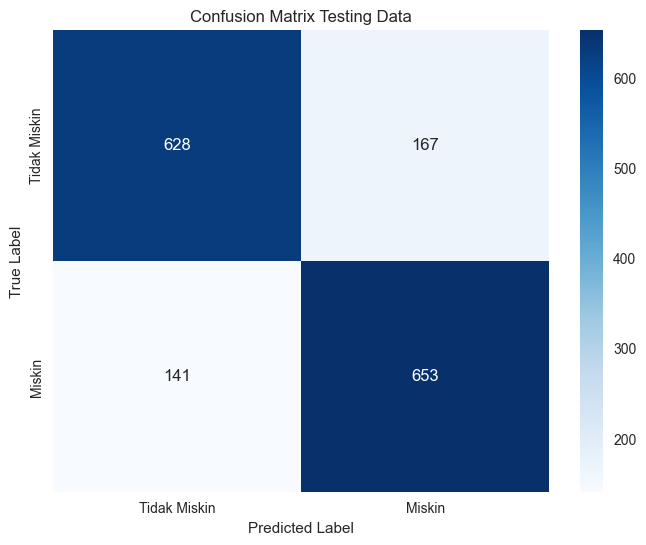

In [68]:
sel_X_train_final = X_train_v3[selected_features_combined]
sel_X_test_final = X_test_v3[selected_features_combined]
eval_model_holdout(stacking_ensemble, sel_X_train_final, y_train_v3, sel_X_test_final, y_test_v3, plot=True)

In [69]:
eval_model_CV(stacking_ensemble, X_ori[selected_features_combined], y_ori)

Mean Bal Acc (Test)  : 0.63
Mean F1 Score (Test) : 0.39
Mean Kappa (Test)    : 0.34
Mean Sensitivity (Test): 0.29
Mean Specificity (Test): 0.98


## Seleksi Fitur - MI

In [70]:
X_train_v1, X_test_v1, y_train_v1, y_test_v1 = X_train.copy(), X_test.copy(), y_train.copy(), y_test.copy()

In [71]:
# Lists to store evaluation metrics
bal_acc_list = []
f1_score_list = []
kappa_list = []
k_list = []

for k in range(1, 21): 
    # Mutual Information untuk Random Forest
    selector_rf = SelectKBest(score_func=mutual_info_classif, k=k)
    sel_X_train_rf = selector_rf.fit_transform(X_train_v1, y_train_v1)
    sel_X_test_rf = selector_rf.transform(X_test_v1)

    # Mutual Information untuk XGBoost
    selector_xgb = SelectKBest(score_func=mutual_info_classif, k=k)
    sel_X_train_xgb = selector_xgb.fit_transform(X_train_v1, y_train_v1)
    sel_X_test_xgb = selector_xgb.transform(X_test_v1)

    # Gabungkan fitur yang terpilih oleh kedua model
    sel_X_train_v1 = np.concatenate([sel_X_train_rf, sel_X_train_xgb], axis=1)
    sel_X_test_v1 = np.concatenate([sel_X_test_rf, sel_X_test_xgb], axis=1)

    # Melatih stacking ensemble pada data hasil seleksi fitur
    stacking_ensemble.fit(sel_X_train_v1, y_train_v1)
    mi_preds = stacking_ensemble.predict(sel_X_test_v1)

    # Hitung metrik evaluasi
    bal_acc_kbest = round(balanced_accuracy_score(y_test_v1, mi_preds), 2)
    f1_score_kbest = round(f1_score(y_test_v1, mi_preds), 2)
    kappa_kbest = round(cohen_kappa_score(y_test_v1, mi_preds), 2)

    # Simpan metrik evaluasi
    bal_acc_list.append(bal_acc_kbest)
    f1_score_list.append(f1_score_kbest)
    kappa_list.append(kappa_kbest)
    k_list.append(k)

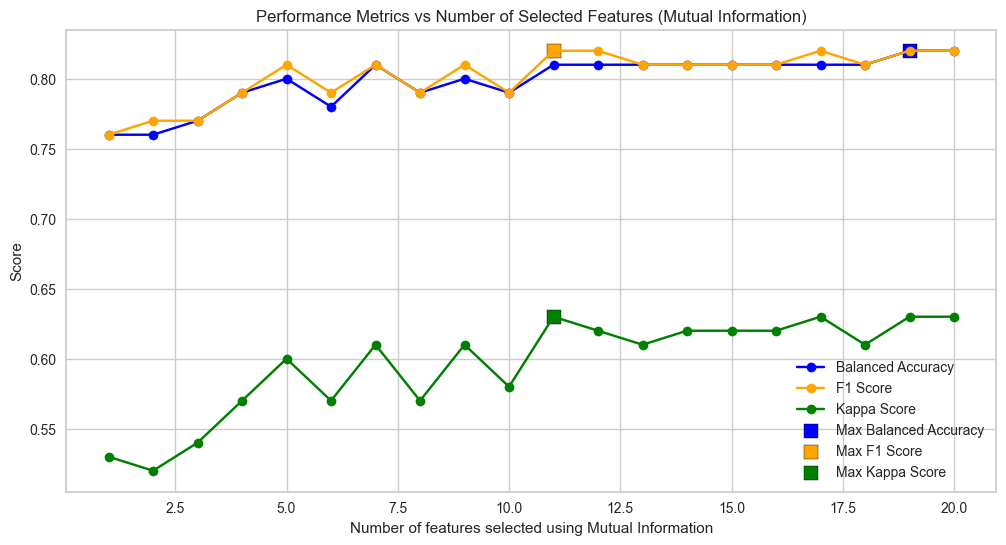

In [72]:
# Plotting the results
plt.figure(figsize=(12, 6))

# Plot each metric
plt.plot(k_list, bal_acc_list, marker='o', label='Balanced Accuracy', color='blue')
plt.plot(k_list, f1_score_list, marker='o', label='F1 Score', color='orange')
plt.plot(k_list, kappa_list, marker='o', label='Kappa Score', color='green')

# Mark maximum values
max_bal_acc = np.max(bal_acc_list)
max_f1 = np.max(f1_score_list)
max_kappa = np.max(kappa_list)

# Find the index of the best k for each metric
max_bal_acc_idx = np.argmax(bal_acc_list)
max_f1_idx = np.argmax(f1_score_list)
max_kappa_idx = np.argmax(kappa_list)

# Display max values on the plot
plt.scatter(k_list[max_bal_acc_idx], max_bal_acc, color='blue', s=100, edgecolor='black', label='Max Balanced Accuracy', marker='s')
plt.scatter(k_list[max_f1_idx], max_f1, color='orange', s=100, edgecolor='black', label='Max F1 Score', marker='s')
plt.scatter(k_list[max_kappa_idx], max_kappa, color='green', s=100, edgecolor='black', label='Max Kappa Score', marker='s')

# Add labels and title
plt.xlabel('Number of features selected using Mutual Information')
plt.ylabel('Score')
plt.title('Performance Metrics vs Number of Selected Features (Mutual Information)')
plt.legend()
plt.grid(True)
plt.show()

In [73]:
# Print maximum scores
print('Max Bal Acc:', max_bal_acc)
print('Max F1 score:', max_f1)
print('Max kappa:', max_kappa)

Max Bal Acc: 0.82
Max F1 score: 0.82
Max kappa: 0.63


In [74]:
# Determine best k based on balanced accuracy
best_k_using_bal_acc = np.argmax(bal_acc_list) + 1
best_k_using_bal_acc

19

In [75]:
# Tentukan jumlah fitur terbaik berdasarkan hasil evaluasi
best_k_using_bal_acc = np.argmax(bal_acc_list) + 1  # Menggunakan jumlah fitur terbaik dari evaluasi loop

# Seleksi fitur terbaik untuk Random Forest
selector_rf = SelectKBest(score_func=mutual_info_classif, k=best_k_using_bal_acc)
sel_X_train_rf = selector_rf.fit_transform(X_train_v1, y_train_v1)  # Menggunakan v1
sel_X_test_rf = selector_rf.transform(X_test_v1)  # Menggunakan v1
selected_features_rf = X_train_v1.columns[selector_rf.get_support()]  # Fitur terpilih RF

# Seleksi fitur terbaik untuk XGBoost
selector_xgb = SelectKBest(score_func=mutual_info_classif, k=best_k_using_bal_acc)
sel_X_train_xgb = selector_xgb.fit_transform(X_train_v1, y_train_v1)  # Menggunakan v1
sel_X_test_xgb = selector_xgb.transform(X_test_v1)  # Menggunakan v1
selected_features_xgb = X_train_v1.columns[selector_xgb.get_support()]  # Fitur terpilih XGB

# Menggabungkan fitur tanpa duplikasi
selected_features_combined = list(set(selected_features_rf).union(set(selected_features_xgb)))

# Jika gabungan fitur melebihi jumlah best_k_using_bal_acc, pilih hanya `best_k_using_bal_acc` fitur
if len(selected_features_combined) > best_k_using_bal_acc:
    # Menghitung frekuensi kemunculan fitur yang terpilih di antara kedua model
    all_selected_features = list(selected_features_rf) + list(selected_features_xgb)
    feature_counts = pd.Series(all_selected_features).value_counts()

    # Memilih hanya `best_k_using_bal_acc` fitur yang paling sering muncul
    selected_features_combined = feature_counts.nlargest(best_k_using_bal_acc).index.tolist()

# Seleksi data latih dan data uji berdasarkan fitur gabungan yang telah dipilih
sel_X_train_final = X_train_v1[selected_features_combined]
sel_X_test_final = X_test_v1[selected_features_combined]

# Memeriksa apakah selected_features_combined telah berhasil dibuat dan sesuai dengan jumlah fitur yang diinginkan
print("Fitur terpilih untuk model stacking:", selected_features_combined)
print("Jumlah fitur terpilih:", len(selected_features_combined))

Fitur terpilih untuk model stacking: ['R2208A2', 'rataan_lainnya(rp)', 'rataan_beras(rp)', 'nilai_bantuan(rp)', 'R2208A5', 'R2208A4', 'R2208A3', 'KALORI_KAP', 'Pengeluaran_Jenis_N', 'rataan_telur(rp)', 'Pengeluaran_Jenis_L', 'Pengeluaran_Jenis_J', 'Pengeluaran_Jenis_I', 'Pengeluaran_Jenis_H', 'Pengeluaran_Jenis_D', 'Pengeluaran_Jenis_B', 'Pengeluaran_Jenis_C', 'Pengeluaran_Jenis_A', 'R105']
Jumlah fitur terpilih: 19


Holdout Evaluation (Train):
Balanced Accuracy: 0.86
F1 Score: 0.87
Kappa: 0.73

Holdout Evaluation (Test):
Balanced Accuracy: 0.81
F1 Score: 0.82
Kappa: 0.63
Sensitivity (Recall): 0.84
Specificity: 0.79


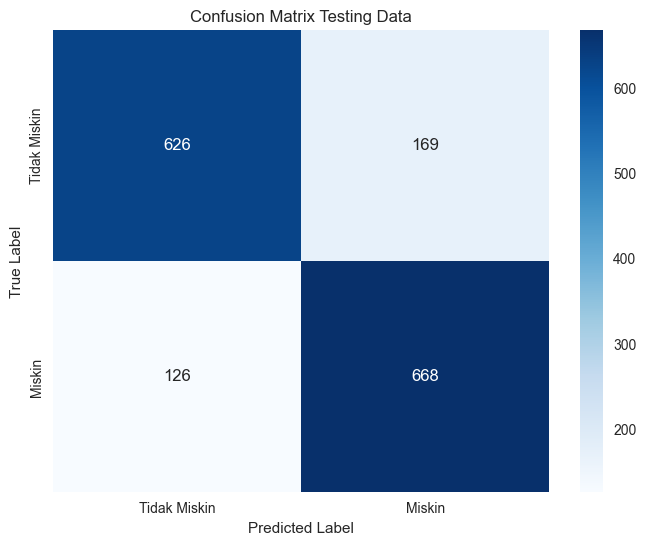

In [76]:
sel_X_train_final = X_train_v1[selected_features_combined]
sel_X_test_final = X_test_v1[selected_features_combined]
eval_model_holdout(stacking_ensemble, sel_X_train_final, y_train_v1, sel_X_test_final, y_test_v1, plot=True)

In [77]:
eval_model_CV(stacking_ensemble, X_ori[selected_features_combined], y_ori)

Mean Bal Acc (Test)  : 0.65
Mean F1 Score (Test) : 0.42
Mean Kappa (Test)    : 0.38
Mean Sensitivity (Test): 0.32
Mean Specificity (Test): 0.98


## Simpulan

Karena hasil dari RFE 9 fitur dan MI 19 fitur menghasilkan nilai yang relatif sama, maka akan dinilai efisiensi waktu dalam memproses data dimana RFE lebih efisien. Sehingga kita dapat simpulkan bahwa RFE lebih baik

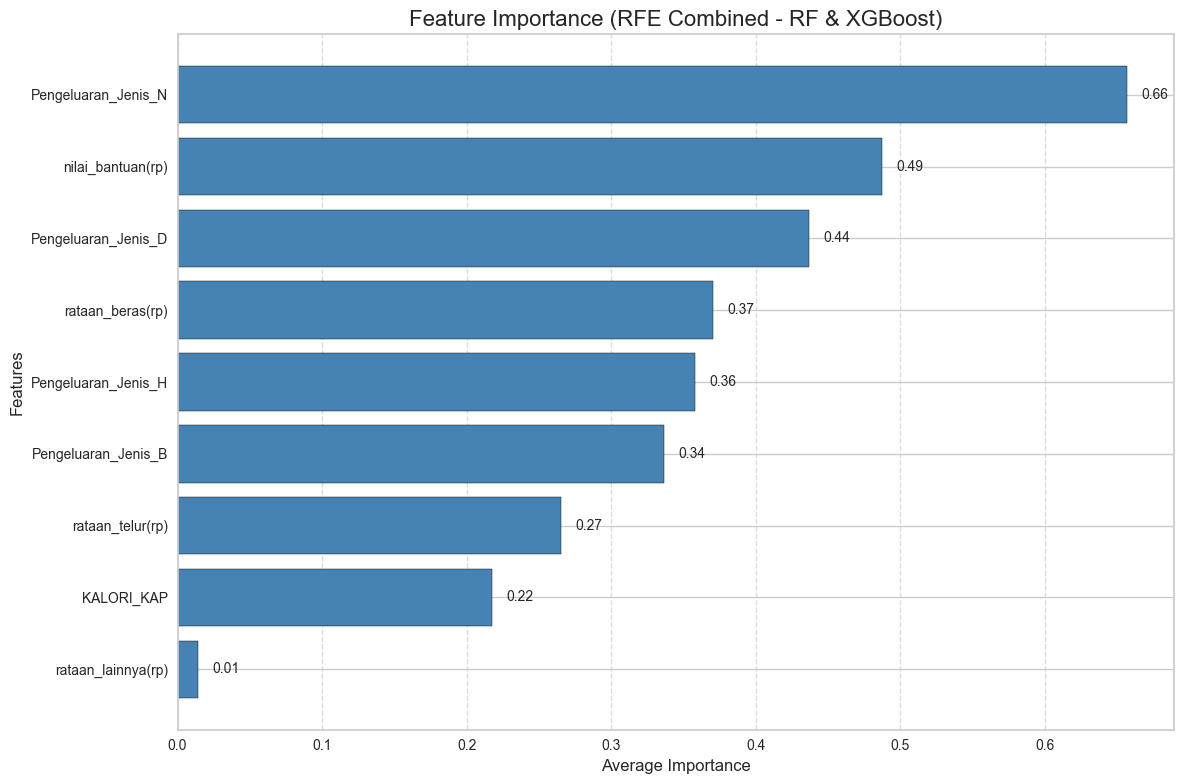

In [84]:
# Running ulang RFE dahulu
rf_importances = np.random.rand(len(selected_features_rf))  
xgb_importances = np.random.rand(len(selected_features_xgb)) 

combined_importances = pd.DataFrame({
    'Feature': list(selected_features_combined),
    'RF Importance': [rf_importances[selected_features_rf.get_loc(feat)] if feat in selected_features_rf else 0 for feat in selected_features_combined],
    'XGB Importance': [xgb_importances[selected_features_xgb.get_loc(feat)] if feat in selected_features_xgb else 0 for feat in selected_features_combined]
})

combined_importances['Average Importance'] = combined_importances[['RF Importance', 'XGB Importance']].mean(axis=1)
combined_importances = combined_importances.sort_values(by='Average Importance', ascending=False)

plt.figure(figsize=(12, 8))
plt.barh(combined_importances['Feature'], combined_importances['Average Importance'], color='steelblue', edgecolor='black')
plt.xlabel('Average Importance', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title('Feature Importance (RFE Combined - RF & XGBoost)', fontsize=16)
plt.gca().invert_yaxis() 
plt.grid(axis='x', linestyle='--', alpha=0.7)
for i, val in enumerate(combined_importances['Average Importance']):
    plt.text(val + 0.01, i, f'{val:.2f}', va='center', fontsize=10)
plt.tight_layout()
plt.show()

# Pemodelan Skenario 3

In [ ]:
# X = df_model.drop(['FOOD_LABEL', 'PROTE_KAP', 'LEMAK_KAP', 'KARBO_KAP'], axis=1)
# y = df_model['FOOD_LABEL']

# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.25, shuffle=True, stratify=y, random_state=74
# )

# sm = SMOTE(random_state=86, sampling_strategy=1)
# X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
# X_train_smote_ori = X_train_smote.copy()
# y_train_smote_ori = y_train_smote.copy()
# X_test_ori = X_test.copy()
# y_test_ori = y_test.copy()

In [13]:
from imblearn.over_sampling import ADASYN

# Splitting the dataset
X = df_model.drop(['FOOD_LABEL', 'PROTE_KAP', 'LEMAK_KAP', 'KARBO_KAP', 'nilai_bantuan(rp)', 'rataan_beras(rp)', 'rataan_telur(rp)', 'rataan_lainnya(rp)'], axis=1)
y = df_model['FOOD_LABEL']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, shuffle=True, stratify=y, random_state=74
)

# Applying ADASYN for oversampling
adasyn = ADASYN(random_state=86, sampling_strategy=0.5)
X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train, y_train)

# Keeping original copies for further use
X_train_adasyn_ori = X_train_adasyn.copy()
y_train_adasyn_ori = y_train_adasyn.copy()
X_test_ori = X_test.copy()
y_test_ori = y_test.copy()

In [14]:
print(X_train_adasyn.shape)
print(X_test.shape)

(24214, 20)
(7711, 20)


In [15]:
def eval_model_holdout(model, xtrain, ytrain, xtest, ytest, plot=False):
    model.fit(xtrain, ytrain)
    y_pred_train = model.predict(xtrain)
    y_pred_test = model.predict(xtest)
    
    cm_test = confusion_matrix(ytest, y_pred_test)
    tn, fp, fn, tp = cm_test.ravel()
    sensitivity = tp / (tp + fn) 
    specificity = tn / (tn + fp) 

    print("Holdout Evaluation (Train):")
    print("Balanced Accuracy:", round(balanced_accuracy_score(ytrain, y_pred_train), 2))
    print("F1 Score:", round(f1_score(ytrain, y_pred_train), 2))
    print("Kappa:", round(cohen_kappa_score(ytrain, y_pred_train), 2))

    print("\nHoldout Evaluation (Test):")
    print("Balanced Accuracy:", round(balanced_accuracy_score(ytest, y_pred_test), 2))
    print("F1 Score:", round(f1_score(ytest, y_pred_test), 2))
    print("Kappa:", round(cohen_kappa_score(ytest, y_pred_test), 2))
    print("Sensitivity (Recall):", round(sensitivity, 2))
    print("Specificity:", round(specificity, 2))

    if plot:
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues',
                    xticklabels=['Tidak Miskin', 'Miskin'], yticklabels=['Tidak Miskin', 'Miskin'])
        plt.title('Confusion Matrix Testing Data')
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.show()

In [ ]:
# Fungsi untuk menghitung specificity
def specificity_score(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()
    return tn / (tn + fp)

# Scorers
specificity_scorer = make_scorer(specificity_score)
sensitivity_scorer = make_scorer(recall_score)

# Fungsi evaluasi cross-validation dengan ADASYN
def eval_model_CV_with_adasyn_fixed(model, X, y):
    # Pipeline untuk ADASYN + Model
    pipeline = Pipeline([
        ('adasyn', ADASYN(random_state=86, sampling_strategy=1)),
        ('model', model)
    ])
    
    # Stratified K-Fold untuk menjaga proporsi kelas
    cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=86)
    
    # Validasi silang
    cv_results = cross_validate(
        pipeline, X, y, cv=cv, 
        scoring={
            'balanced_accuracy': 'balanced_accuracy',
            'f1': 'f1',
            'kappa': make_scorer(cohen_kappa_score),
            'sensitivity': sensitivity_scorer,
            'specificity': specificity_scorer
        },
        return_train_score=False
    )

    # Hasil rata-rata metrik
    balanced_acc_scores = cv_results['test_balanced_accuracy']
    f1_scores = cv_results['test_f1']
    kappa_scores = cv_results['test_kappa']
    sensitivity_scores = cv_results['test_sensitivity']
    specificity_scores = cv_results['test_specificity']
    
    mean_bal_acc = round(np.mean(balanced_acc_scores), 2)
    mean_f1 = round(np.mean(f1_scores), 2)
    mean_kappa = round(np.mean(kappa_scores), 2)
    mean_sensitivity = round(np.mean(sensitivity_scores), 2)
    mean_specificity = round(np.mean(specificity_scores), 2)
    
    print('Mean Balanced Accuracy (Test):', mean_bal_acc)
    print('Mean F1 Score (Test):', mean_f1)
    print('Mean Kappa (Test):', mean_kappa)
    print('Mean Sensitivity (Test):', mean_sensitivity)
    print('Mean Specificity (Test):', mean_specificity)


In [17]:
def mergeXy_for_CV(X1, X2, y_train, y_test):
    merge_X = pd.concat([X1, X2], ignore_index=True)
    merge_y = y_train.tolist() + y_test.tolist()
    return merge_X, merge_y

In [18]:
def objective_rf(trial):
    # Parameter tuning untuk Random Forest
    n_estimators = trial.suggest_int('n_estimators', 100, 1000)
    max_depth = trial.suggest_int('max_depth', 5, 50)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 32)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 32)
    max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2'])
    max_leaf_nodes = trial.suggest_int('max_leaf_nodes', 10, 100, step=10)
    class_weight = trial.suggest_categorical('class_weight', [None, 'balanced', 'balanced_subsample'])

    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        max_leaf_nodes=max_leaf_nodes,
        class_weight=class_weight,
        random_state=74
    )
    
    # Fit dan prediksi
    model.fit(X_train_adasyn, y_train_adasyn)
    y_pred = model.predict(X_test)
    
    # Metode evaluasi (gunakan F1-score)
    score = f1_score(y_test, y_pred)
    return score

In [19]:
def objective_xgb(trial):
    # Parameter tuning untuk XGBoost
    n_estimators = trial.suggest_int('n_estimators', 100, 1000)
    max_depth = trial.suggest_int('max_depth', 3, 15)
    learning_rate = trial.suggest_float('learning_rate', 0.001, 0.3)
    subsample = trial.suggest_float('subsample', 0.5, 1.0)
    colsample_bytree = trial.suggest_float('colsample_bytree', 0.5, 1.0)
    scale_pos_weight = trial.suggest_float('scale_pos_weight', 1.0, 10.0)

    model = XGBClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        learning_rate=learning_rate,
        subsample=subsample,
        colsample_bytree=colsample_bytree,
        scale_pos_weight=scale_pos_weight,
        random_state=74,
        eval_metric='logloss'
    )
    
    # Fit dan prediksi
    model.fit(X_train_adasyn, y_train_adasyn)
    y_pred = model.predict(X_test)
    
    # Metode evaluasi (gunakan F1-score)
    score = f1_score(y_test, y_pred)
    return score


In [20]:
# Objective function untuk SVM dengan kernel RBF
def objective_svm(trial):
    # Parameter tuning untuk SVM
    C = trial.suggest_float('C', 0.1, 100.0, log=True)  # Log scale untuk rentang yang besar
    gamma = trial.suggest_float('gamma', 1e-4, 1e-1, log=True)  # Log scale untuk rentang kecil
    class_weight = trial.suggest_categorical('class_weight', [None, 'balanced'])

    model = SVC(
        kernel='rbf',
        C=C,
        gamma=gamma,
        class_weight=class_weight,
        random_state=74
    )
    
    # Fit model pada data oversampling SMOTE
    model.fit(X_train_adasyn, y_train_adasyn)
    y_pred = model.predict(X_test)
    
    # Evaluasi menggunakan F1-score
    score = f1_score(y_test, y_pred)
    return score

In [46]:
# Optimasi untuk Random Forest
study_rf = optuna.create_study(direction='maximize', sampler=optuna.samplers.RandomSampler(seed=74))
study_rf.optimize(objective_rf, n_trials=100)

# Print hasil terbaik untuk RF
print("Best trial for Random Forest:")
trial_rf = study_rf.best_trial
print("Value: {:.4f}".format(trial_rf.value))
print("Params: ")
for key, value in trial_rf.params.items():
    print("    {}: {}".format(key, value))

# Optimasi untuk XGBoost
study_xgb = optuna.create_study(direction='maximize', sampler=optuna.samplers.RandomSampler(seed=74))
study_xgb.optimize(objective_xgb, n_trials=100)

# Print hasil terbaik untuk XGB
print("Best trial for XGBoost:")
trial_xgb = study_xgb.best_trial
print("Value: {:.4f}".format(trial_xgb.value))
print("Params: ")
for key, value in trial_xgb.params.items():
    print("    {}: {}".format(key, value))

# Optimasi untuk SVM
study_svm = optuna.create_study(direction='maximize', sampler=optuna.samplers.RandomSampler(seed=74))
study_svm.optimize(objective_svm, n_trials=100)

# Print hasil terbaik untuk SVM
print("Best trial for SVM:")
trial_svm = study_svm.best_trial
print("Value: {:.4f}".format(trial_svm.value))
print("Params: ")
for key, value in trial_svm.params.items():
    print("    {}: {}".format(key, value))

[I 2024-11-22 23:10:24,229] A new study created in memory with name: no-name-f77f61a5-11a3-483c-aca1-e57c12898b68
[I 2024-11-22 23:10:26,943] Trial 0 finished with value: 0.42875078468298805 and parameters: {'n_estimators': 282, 'max_depth': 41, 'min_samples_split': 28, 'min_samples_leaf': 11, 'max_features': 'log2', 'max_leaf_nodes': 80, 'class_weight': 'balanced'}. Best is trial 0 with value: 0.42875078468298805.
[I 2024-11-22 23:10:37,957] Trial 1 finished with value: 0.4315090161341348 and parameters: {'n_estimators': 883, 'max_depth': 26, 'min_samples_split': 4, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_leaf_nodes': 80, 'class_weight': 'balanced_subsample'}. Best is trial 1 with value: 0.4315090161341348.
[I 2024-11-22 23:10:39,480] Trial 2 finished with value: 0.42709959413050264 and parameters: {'n_estimators': 126, 'max_depth': 29, 'min_samples_split': 26, 'min_samples_leaf': 26, 'max_features': 'log2', 'max_leaf_nodes': 90, 'class_weight': 'balanced_subsample'}. Best

Best trial for Random Forest:
Value: 0.5156
Params: 
    n_estimators: 144
    max_depth: 38
    min_samples_split: 32
    min_samples_leaf: 22
    max_features: log2
    max_leaf_nodes: 40
    class_weight: None


[I 2024-11-22 23:17:45,904] Trial 0 finished with value: 0.3848773841961853 and parameters: {'n_estimators': 282, 'max_depth': 13, 'learning_rate': 0.2583006345318723, 'subsample': 0.6635426005407173, 'colsample_bytree': 0.6244302380424167, 'scale_pos_weight': 8.293273446218297}. Best is trial 0 with value: 0.3848773841961853.
[I 2024-11-22 23:17:47,746] Trial 1 finished with value: 0.39880952380952384 and parameters: {'n_estimators': 742, 'max_depth': 11, 'learning_rate': 0.2134368858518404, 'subsample': 0.5564504375850587, 'colsample_bytree': 0.9349860017280363, 'scale_pos_weight': 5.287850356293555}. Best is trial 1 with value: 0.39880952380952384.
[I 2024-11-22 23:17:47,948] Trial 2 finished with value: 0.45495495495495497 and parameters: {'n_estimators': 172, 'max_depth': 4, 'learning_rate': 0.09788325186003417, 'subsample': 0.5033786924107092, 'colsample_bytree': 0.8584400363702955, 'scale_pos_weight': 1.585690493494888}. Best is trial 2 with value: 0.45495495495495497.
[I 2024-1

Best trial for XGBoost:
Value: 0.4772
Params: 
    n_estimators: 598
    max_depth: 15
    learning_rate: 0.008838055671476611
    subsample: 0.7964048654103362
    colsample_bytree: 0.7937467458368941
    scale_pos_weight: 1.3406222330400082


[I 2024-11-22 23:20:39,022] Trial 0 finished with value: 0.5124265702666064 and parameters: {'C': 0.4042098387048983, 'gamma': 0.022575782499416518, 'class_weight': None}. Best is trial 0 with value: 0.5124265702666064.
[I 2024-11-22 23:20:57,609] Trial 1 finished with value: 0.5133062697338746 and parameters: {'C': 0.5579322021036928, 'gamma': 0.026983056872895872, 'class_weight': None}. Best is trial 1 with value: 0.5133062697338746.
[I 2024-11-22 23:21:17,339] Trial 2 finished with value: 0.5100182149362478 and parameters: {'C': 13.535483415980607, 'gamma': 0.00021812358426198786, 'class_weight': None}. Best is trial 1 with value: 0.5133062697338746.
[I 2024-11-22 23:21:41,786] Trial 3 finished with value: 0.03444034440344403 and parameters: {'C': 0.1741055609747699, 'gamma': 0.00027945467914323194, 'class_weight': None}. Best is trial 1 with value: 0.5133062697338746.
[I 2024-11-22 23:22:05,767] Trial 4 finished with value: 0.44879321591650356 and parameters: {'C': 14.1462138221274

Best trial for SVM:
Value: 0.5202
Params: 
    C: 9.997852831644716
    gamma: 0.015965634762241
    class_weight: None


## Baseline Model

In [21]:
rf_model = RandomForestClassifier(n_estimators=144, random_state=74, max_depth=38, min_samples_split=12, min_samples_leaf=22, max_features='log2', max_leaf_nodes=40)
#xgb_model = XGBClassifier(random_state=86, eval_metric='logloss', learning_rate=0.022, max_depth=11, n_estimators=185, subsample=0.65, colsample_bytree=0.922)
svm_model = SVC(kernel='rbf', C=9.9978, gamma=0.01596, random_state=74, probability=True)

Holdout Evaluation (Train):
Balanced Accuracy: 0.77
F1 Score: 0.69
Kappa: 0.54

Holdout Evaluation (Test):
Balanced Accuracy: 0.78
F1 Score: 0.48
Kappa: 0.4
Sensitivity (Recall): 0.71
Specificity: 0.85


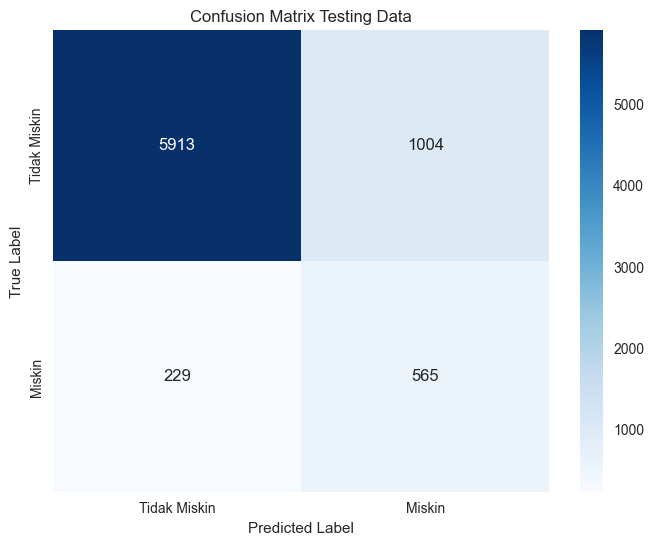

In [22]:
stacking_ensemble = StackingClassifier(
    estimators=[
        ('rf', rf_model),
        #('xgb', xgb_model),
        ('svm', svm_model)],
    final_estimator=XGBClassifier(n_estimators=598, max_depth=15, learning_rate=0.0088, random_state=86, eval_metric='logloss'))
eval_model_holdout(stacking_ensemble, X_train_adasyn, y_train_adasyn, X_test, y_test, plot=True)

In [24]:
eval_model_CV_with_adasyn_fixed(stacking_ensemble, X, y)

Mean Balanced Accuracy (Test): 0.79
Mean F1 Score (Test): 0.42
Mean Kappa (Test): 0.31
Mean Sensitivity (Test): 0.84
Mean Specificity (Test): 0.75


## Seleksi Fitur RFE

In [39]:
X_train_v3, X_test_v3 = X_train.copy(), X_test.copy()
y_train_v3, y_test_v3 = y_train.copy(), y_test.copy()

X_train_smote_v3 = X_train_smote.copy()
y_train_smote_v3 = y_train_smote.copy()

In [40]:
# List untuk menyimpan metrik evaluasi
bal_acc_list = []
f1_score_list = []
kappa_list = []
k_list = []

for k in range(1, 22):
    # RFE dengan Random Forest pada data SMOTE
    RFE_rf = RFE(estimator=rf_model, n_features_to_select=k, step=1)
    RFE_rf.fit(X_train_smote_v3, y_train_smote_v3)
    sel_X_train_rf = RFE_rf.transform(X_train_smote_v3)
    sel_X_test_rf = RFE_rf.transform(X_test_v3)

    # RFE dengan XGBoost pada data SMOTE
    RFE_xgb = RFE(estimator=xgb_model, n_features_to_select=k, step=1)
    RFE_xgb.fit(X_train_smote_v3, y_train_smote_v3)
    sel_X_train_xgb = RFE_xgb.transform(X_train_smote_v3)
    sel_X_test_xgb = RFE_xgb.transform(X_test_v3)

    # Menggabungkan fitur yang dipilih dari Random Forest dan XGBoost
    sel_X_train_combined = np.concatenate([sel_X_train_rf, sel_X_train_xgb], axis=1)
    sel_X_test_combined = np.concatenate([sel_X_test_rf, sel_X_test_xgb], axis=1)
    
    # Melatih stacking ensemble pada data train SMOTE
    stacking_ensemble.fit(sel_X_train_combined, y_train_smote_v3)
    RFE_preds = stacking_ensemble.predict(sel_X_test_combined)

    # Menghitung metrik evaluasi
    bal_acc_kbest = round(balanced_accuracy_score(y_test_v3, RFE_preds), 2)
    f1_score_kbest = round(f1_score(y_test_v3, RFE_preds), 2)
    kappa_kbest = round(cohen_kappa_score(y_test_v3, RFE_preds), 2)
    
    # Menyimpan hasil evaluasi
    bal_acc_list.append(bal_acc_kbest)
    f1_score_list.append(f1_score_kbest)
    kappa_list.append(kappa_kbest)
    k_list.append(k)

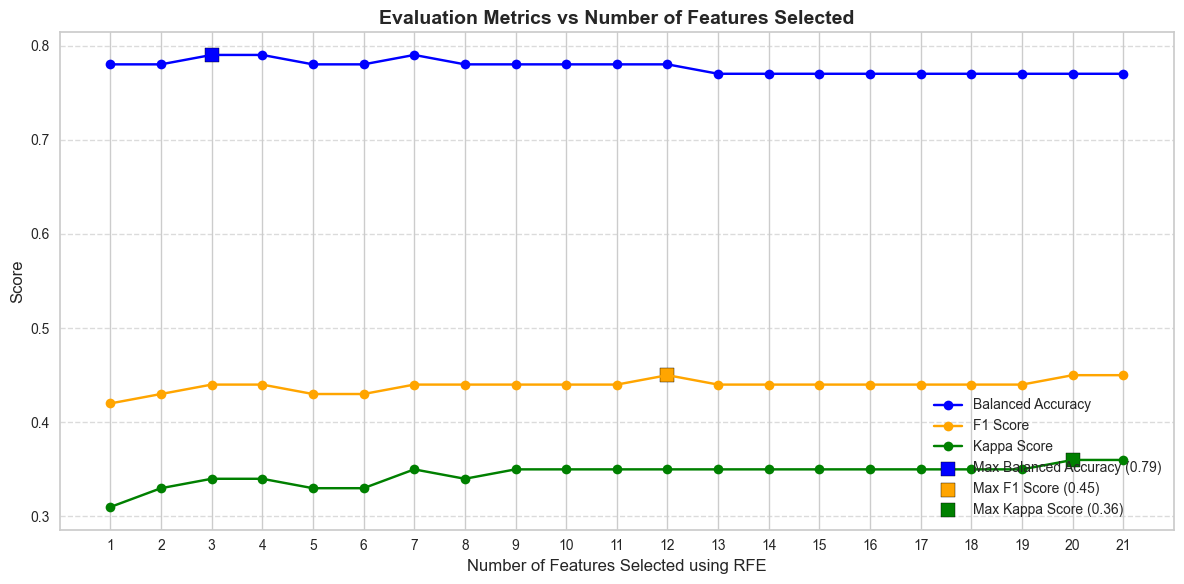

In [ ]:
# Plotting the evaluation results
plt.figure(figsize=(12, 6))

# Plot each metric
plt.plot(k_list, bal_acc_list, marker='o', label='Balanced Accuracy', color='blue')
plt.plot(k_list, f1_score_list, marker='o', label='F1 Score', color='orange')
plt.plot(k_list, kappa_list, marker='o', label='Kappa Score', color='green')

# Mark maximum values for each metric
max_bal_acc = max(bal_acc_list)
max_f1 = max(f1_score_list)
max_kappa = max(kappa_list)

# Highlight points with maximum values
plt.scatter(k_list[np.argmax(bal_acc_list)], max_bal_acc, color='blue', s=100, edgecolor='black', label=f'Max Balanced Accuracy ({max_bal_acc})', marker='s')
plt.scatter(k_list[np.argmax(f1_score_list)], max_f1, color='orange', s=100, edgecolor='black', label=f'Max F1 Score ({max_f1})', marker='s')
plt.scatter(k_list[np.argmax(kappa_list)], max_kappa, color='green', s=100, edgecolor='black', label=f'Max Kappa Score ({max_kappa})', marker='s')

# Customize the plot
plt.title('Evaluation Metrics vs Number of Features Selected', fontsize=14, weight='bold')
plt.xlabel('Number of Features Selected using RFE', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(k_list)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(fontsize=10, loc='lower right')

# Display the plot
plt.tight_layout()
plt.show()

# Pemodelan Skenario 4 {FIX}

In [20]:
from imblearn.over_sampling import ADASYN

# Splitting the dataset
X = df_model.drop(['FOOD_LABEL', 'PROTE_KAP', 'LEMAK_KAP', 'KARBO_KAP'], axis=1)
y = df_model['FOOD_LABEL']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, shuffle=True, stratify=y, random_state=74
)

# Applying ADASYN for oversampling
adasyn = ADASYN(random_state=86, sampling_strategy=0.5)
X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train, y_train)

# Keeping original copies for further use
X_train_adasyn_ori = X_train_adasyn.copy()
y_train_adasyn_ori = y_train_adasyn.copy()
X_test_ori = X_test.copy()
y_test_ori = y_test.copy()

## Def Fungsi

In [15]:
def eval_model_holdout(model, xtrain, ytrain, xtest, ytest, plot=False):
    model.fit(xtrain, ytrain)
    y_pred_train = model.predict(xtrain)
    y_pred_test = model.predict(xtest)
    
    cm_test = confusion_matrix(ytest, y_pred_test)
    tn, fp, fn, tp = cm_test.ravel()
    sensitivity = tp / (tp + fn) 
    specificity = tn / (tn + fp) 
    precision_test = tp / (tp + fp)  
    precision_train = precision_score(ytrain, y_pred_train, zero_division=0)  
    
    print("Holdout Evaluation (Train):")
    print("Balanced Accuracy:", round(balanced_accuracy_score(ytrain, y_pred_train), 2))
    print("Precision:", round(precision_train, 2))  
    print("F1 Score:", round(f1_score(ytrain, y_pred_train), 2))
    print("Kappa:", round(cohen_kappa_score(ytrain, y_pred_train), 2))

    print("\nHoldout Evaluation (Test):")
    print("Balanced Accuracy:", round(balanced_accuracy_score(ytest, y_pred_test), 2))
    print("Precision:", round(precision_test, 2))  
    print("F1 Score:", round(f1_score(ytest, y_pred_test), 2))
    print("Kappa:", round(cohen_kappa_score(ytest, y_pred_test), 2))
    print("Sensitivity (Recall):", round(sensitivity, 2))
    print("Specificity:", round(specificity, 2))

    if plot:
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues',
                    xticklabels=['Tidak Miskin', 'Miskin'], yticklabels=['Tidak Miskin', 'Miskin'])
        plt.title('Confusion Matrix Testing Data')
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.show()

In [16]:
def specificity_score(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()
    return tn / (tn + fp)

specificity_scorer = make_scorer(specificity_score)
sensitivity_scorer = make_scorer(recall_score)
precision_scorer = make_scorer(precision_score, zero_division=0) 

def eval_model_CV_with_adasyn_fixed(model, X, y):
    # Pipeline untuk ADASYN + Model
    pipeline = Pipeline([
        ('adasyn', ADASYN(random_state=86, sampling_strategy=1)),
        ('model', model) ])
    cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=74)
    
    cv_results = cross_validate(
        pipeline, X, y, cv=cv, 
        scoring={
            'balanced_accuracy': 'balanced_accuracy',
            'f1': 'f1',
            'kappa': make_scorer(cohen_kappa_score),
            'sensitivity': sensitivity_scorer,
            'specificity': specificity_scorer,
            'precision': precision_scorer
        },
        return_train_score=False
    )

    # Hasil rata-rata metrik
    mean_bal_acc = round(np.mean(cv_results['test_balanced_accuracy']), 2)
    mean_f1 = round(np.mean(cv_results['test_f1']), 2)
    mean_kappa = round(np.mean(cv_results['test_kappa']), 2)
    mean_sensitivity = round(np.mean(cv_results['test_sensitivity']), 2)
    mean_specificity = round(np.mean(cv_results['test_specificity']), 2)
    mean_precision = round(np.mean(cv_results['test_precision']), 2)
    
    print('Mean Balanced Accuracy (Test):', mean_bal_acc)
    print('Mean F1 Score (Test):', mean_f1)
    print('Mean Kappa (Test):', mean_kappa)
    print('Mean Sensitivity (Test):', mean_sensitivity)
    print('Mean Specificity (Test):', mean_specificity)
    print('Mean Precision (Test):', mean_precision)

In [17]:
def mergeXy_for_CV(X1, X2, y_train, y_test):
    merge_X = pd.concat([X1, X2], ignore_index=True)
    merge_y = y_train.tolist() + y_test.tolist()
    return merge_X, merge_y

In [16]:
def objective_rf(trial):
    n_estimators = trial.suggest_int('n_estimators', 100, 1000)
    max_depth = trial.suggest_int('max_depth', 5, 50)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 32)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 32)
    max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2'])
    max_leaf_nodes = trial.suggest_int('max_leaf_nodes', 10, 100, step=10)
    class_weight = trial.suggest_categorical('class_weight', [None, 'balanced', 'balanced_subsample'])

    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        max_leaf_nodes=max_leaf_nodes,
        class_weight=class_weight,
        random_state=74
    )
    
    model.fit(X_train_adasyn, y_train_adasyn)
    y_pred = model.predict(X_test)
    score = f1_score(y_test, y_pred)
    return score

# Optimasi untuk Random Forest
study_rf = optuna.create_study(direction='maximize', sampler=optuna.samplers.RandomSampler(seed=74))
study_rf.optimize(objective_rf, n_trials=100)
print("Best trial for Random Forest:")
trial_rf = study_rf.best_trial
print("Value: {:.4f}".format(trial_rf.value))
print("Params: ")
for key, value in trial_rf.params.items():
    print("    {}: {}".format(key, value))

[I 2024-11-26 18:38:48,859] A new study created in memory with name: no-name-646853b2-5ee0-45f1-a225-86b33a1caca5
[I 2024-11-26 18:38:51,442] Trial 0 finished with value: 0.42875078468298805 and parameters: {'n_estimators': 282, 'max_depth': 41, 'min_samples_split': 28, 'min_samples_leaf': 11, 'max_features': 'log2', 'max_leaf_nodes': 80, 'class_weight': 'balanced'}. Best is trial 0 with value: 0.42875078468298805.
[I 2024-11-26 18:39:03,098] Trial 1 finished with value: 0.4315090161341348 and parameters: {'n_estimators': 883, 'max_depth': 26, 'min_samples_split': 4, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_leaf_nodes': 80, 'class_weight': 'balanced_subsample'}. Best is trial 1 with value: 0.4315090161341348.
[I 2024-11-26 18:39:05,411] Trial 2 finished with value: 0.42709959413050264 and parameters: {'n_estimators': 126, 'max_depth': 29, 'min_samples_split': 26, 'min_samples_leaf': 26, 'max_features': 'log2', 'max_leaf_nodes': 90, 'class_weight': 'balanced_subsample'}. Best

Best trial for Random Forest:
Value: 0.5156
Params: 
    n_estimators: 144
    max_depth: 38
    min_samples_split: 32
    min_samples_leaf: 22
    max_features: log2
    max_leaf_nodes: 40
    class_weight: None


In [ ]:
def objective_xgb(trial):
    # Parameter tuning untuk XGBoost
    n_estimators = trial.suggest_int('n_estimators', 100, 1000)
    max_depth = trial.suggest_int('max_depth', 3, 15)
    learning_rate = trial.suggest_float('learning_rate', 0.001, 0.3)
    subsample = trial.suggest_float('subsample', 0.5, 1.0)
    colsample_bytree = trial.suggest_float('colsample_bytree', 0.5, 1.0)
    scale_pos_weight = trial.suggest_float('scale_pos_weight', 1.0, 10.0)

    model = XGBClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        learning_rate=learning_rate,
        subsample=subsample,
        colsample_bytree=colsample_bytree,
        scale_pos_weight=scale_pos_weight,
        random_state=74,
        eval_metric='logloss'
    )
    
    model.fit(X_train_adasyn, y_train_adasyn)
    y_pred = model.predict(X_test)
    score = f1_score(y_test, y_pred)
    return score

# Optimasi untuk XGBoost
study_xgb = optuna.create_study(direction='maximize', sampler=optuna.samplers.RandomSampler(seed=74))
study_xgb.optimize(objective_xgb, n_trials=100)
print("Best trial for XGBoost:")
trial_xgb = study_xgb.best_trial
print("Value: {:.4f}".format(trial_xgb.value))
print("Params: ")
for key, value in trial_xgb.params.items():
    print("    {}: {}".format(key, value))

[I 2024-11-25 19:17:42,530] A new study created in memory with name: no-name-6147edb4-1d64-4f4f-83ef-9f8e80bf60ae
[I 2024-11-25 19:17:43,611] Trial 0 finished with value: 0.3607892264328218 and parameters: {'n_estimators': 282, 'max_depth': 13, 'learning_rate': 0.2583006345318723, 'subsample': 0.6635426005407173, 'colsample_bytree': 0.6244302380424167, 'scale_pos_weight': 8.293273446218297}. Best is trial 0 with value: 0.3607892264328218.
[I 2024-11-25 19:17:45,695] Trial 1 finished with value: 0.36407432897453545 and parameters: {'n_estimators': 742, 'max_depth': 11, 'learning_rate': 0.2134368858518404, 'subsample': 0.5564504375850587, 'colsample_bytree': 0.9349860017280363, 'scale_pos_weight': 5.287850356293555}. Best is trial 1 with value: 0.36407432897453545.
[I 2024-11-25 19:17:45,920] Trial 2 finished with value: 0.46504992867332384 and parameters: {'n_estimators': 172, 'max_depth': 4, 'learning_rate': 0.09788325186003417, 'subsample': 0.5033786924107092, 'colsample_bytree': 0.85

Best trial for XGBoost:
Value: 0.4811
Params: 
    n_estimators: 117
    max_depth: 6
    learning_rate: 0.2683143007083129
    subsample: 0.5226258640179463
    colsample_bytree: 0.8640781295206941
    scale_pos_weight: 1.1972981115392969


In [ ]:
def objective_svm(trial):
    # Parameter tuning untuk SVM
    C = trial.suggest_float('C', 0.1, 100.0, log=True)  # Log scale untuk rentang yang besar
    gamma = trial.suggest_float('gamma', 1e-4, 1e-1, log=True)  # Log scale untuk rentang kecil
    class_weight = trial.suggest_categorical('class_weight', [None, 'balanced'])

    model = SVC(
        kernel='rbf',
        C=C,
        gamma=gamma,
        class_weight=class_weight,
        random_state=74
    )
    
    model.fit(X_train_adasyn, y_train_adasyn)
    y_pred = model.predict(X_test)
    score = f1_score(y_test, y_pred)
    return score

# Optimasi untuk SVM
study_svm = optuna.create_study(direction='maximize', sampler=optuna.samplers.RandomSampler(seed=74))
study_svm.optimize(objective_svm, n_trials=100)
print("Best trial for SVM:")
trial_svm = study_svm.best_trial
print("Value: {:.4f}".format(trial_svm.value))
print("Params: ")
for key, value in trial_svm.params.items():
    print("    {}: {}".format(key, value))

In [ ]:
def objective_logistic(trial):
    # Parameter tuning untuk Logistic Regression
    penalty = trial.suggest_categorical('penalty', ['l1', 'l2', 'elasticnet', None]) 
    solver = trial.suggest_categorical('solver', ['lbfgs', 'saga', 'liblinear'])

    # Kombinasi solver dan penalty valid
    if penalty == 'l1' and solver not in ['liblinear', 'saga']:
        raise optuna.exceptions.TrialPruned()
    if penalty == 'elasticnet' and solver != 'saga':
        raise optuna.exceptions.TrialPruned()
    if penalty is None and solver not in ['lbfgs', 'saga']:
        raise optuna.exceptions.TrialPruned()
    
    C = trial.suggest_float('C', 0.01, 10.0, log=True)
    l1_ratio = None
    if penalty == 'elasticnet':  # Elasticnet memerlukan l1_ratio
        l1_ratio = trial.suggest_float('l1_ratio', 0.0, 1.0)
    
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('logreg', LogisticRegression(
            penalty=penalty,
            solver=solver,
            C=C,
            l1_ratio=l1_ratio,
            random_state=74,
            max_iter=1000
        ))
    ])
    
    pipeline.fit(X_train_adasyn, y_train_adasyn)
    y_pred = pipeline.predict(X_test)
    score = f1_score(y_test, y_pred)
    return score

# Optimasi untuk Logistic Regression
study_logreg = optuna.create_study(direction='maximize', sampler=optuna.samplers.RandomSampler(seed=74))
study_logreg.optimize(objective_logistic, n_trials=100)
print("Best trial for Logistic Regression:")
trial_logreg = study_logreg.best_trial
print("Value: {:.4f}".format(trial_logreg.value))
print("Params: ")
for key, value in trial_logreg.params.items():
    print("    {}: {}".format(key, value))

[I 2024-11-25 22:40:38,754] A new study created in memory with name: no-name-d17a1dae-0d68-49aa-b4a7-c9eab2e1652e
[I 2024-11-25 22:40:38,952] Trial 0 finished with value: 0.5141007859454462 and parameters: {'penalty': 'elasticnet', 'solver': 'saga', 'C': 0.9637962676359452, 'l1_ratio': 0.7104912570295666}. Best is trial 0 with value: 0.5141007859454462.
[I 2024-11-25 22:40:39,110] Trial 1 finished with value: 0.5141007859454462 and parameters: {'penalty': 'l2', 'solver': 'saga', 'C': 1.4146213822127405}. Best is trial 0 with value: 0.5141007859454462.
[I 2024-11-25 22:40:39,111] Trial 2 pruned. 
[I 2024-11-25 22:40:39,111] Trial 3 pruned. 
[I 2024-11-25 22:40:39,112] Trial 4 pruned. 
c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
[I 2024-11-25 22:40:39,164] Trial 5 finished with value: 0.5138632162661737 and parameters: {'penalt

Best trial for Logistic Regression:
Value: 0.5182
Params: 
    penalty: elasticnet
    solver: saga
    C: 0.01888549064951492
    l1_ratio: 0.0737120014921957


## Baseline Model

In [21]:
# Stacking Pipeline
pipeline_rf = Pipeline([
    ('rf', RandomForestClassifier(n_estimators=144, random_state=74, max_depth=38, min_samples_split=32, 
                                  min_samples_leaf=22, max_features='log2', max_leaf_nodes=40))
])

pipeline_svm = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(kernel='rbf', C=1.31047, gamma=0.0002959, random_state=74, probability=True))
])

Holdout Evaluation (Train):
Balanced Accuracy: 0.78
Precision: 0.74
F1 Score: 0.7
Kappa: 0.57

Holdout Evaluation (Test):
Balanced Accuracy: 0.79
Precision: 0.4
F1 Score: 0.51
Kappa: 0.44
Sensitivity (Recall): 0.7
Specificity: 0.88


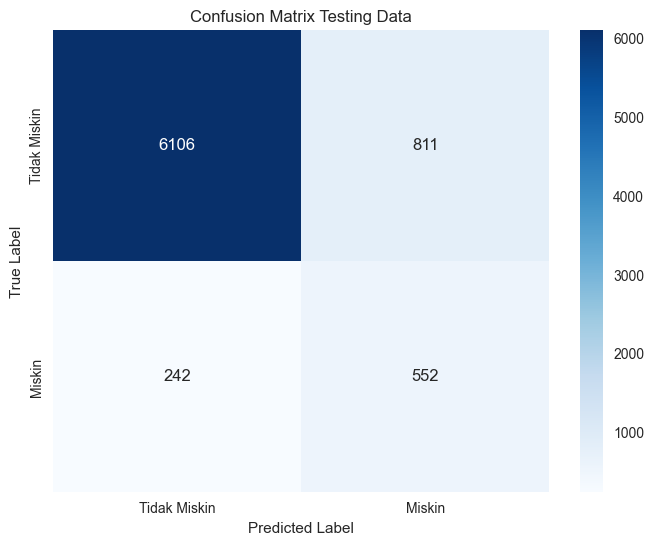

In [22]:
stacking_ensemble = StackingClassifier(
    estimators=[
        ('rf', pipeline_rf),
        ('svm', pipeline_svm)
    ],
    final_estimator=LogisticRegression(penalty='elasticnet', solver='saga', C=0.01888549064951492, l1_ratio=0.0737120014921957)
)
eval_model_holdout(stacking_ensemble, X_train_adasyn, y_train_adasyn, X_test, y_test, plot=True)

In [ ]:
from sklearn.preprocessing import FunctionTransformer

# Transformer untuk ADASYN
def apply_adasyn(X, y):
    ada = ADASYN(random_state=74, sampling_strategy=0.5)
    return ada.fit_resample(X, y)

adasyn_transformer = FunctionTransformer(apply_adasyn, validate=False)

# Pipeline dengan ADASYN
stacking_pipeline = Pipeline([
    ('adasyn', adasyn_transformer),
    ('stacking', stacking_ensemble)
])

eval_model_CV_with_adasyn_fixed(stacking_pipeline, X, y)

## Seleksi Fitur

In [21]:
X_train_v3, X_test_v3 = X_train.copy(), X_test.copy()
y_train_v3, y_test_v3 = y_train.copy(), y_test.copy()

X_train_adasyn_v3 = X_train_adasyn_ori.copy()
y_train_adasyn_v3 = y_train_adasyn_ori.copy()

In [22]:
bal_acc_list = []
f1_score_list = []
kappa_list = []
k_list = []
scaler = StandardScaler()

for k in range(1, 20):
    rf_model_base = RandomForestClassifier(
        n_estimators=144, random_state=74, max_depth=38, 
        min_samples_split=32, min_samples_leaf=22, 
        max_features='log2', max_leaf_nodes=40
    )
    RFE_rf = RFE(estimator=rf_model_base, n_features_to_select=k, step=1)
    RFE_rf.fit(X_train_adasyn_v3, y_train_adasyn_v3)
    sel_X_train_rf = RFE_rf.transform(X_train_adasyn_v3)
    sel_X_test_rf = RFE_rf.transform(X_test_v3)

    X_train_scaled = scaler.fit_transform(X_train_adasyn_v3)
    X_test_scaled = scaler.transform(X_test_v3)

    skb = SelectKBest(score_func=f_classif, k=k)
    sel_X_train_svm = skb.fit_transform(X_train_scaled, y_train_adasyn_v3)
    sel_X_test_svm = skb.transform(X_test_scaled)

    sel_X_train_combined = np.concatenate([sel_X_train_rf, sel_X_train_svm], axis=1)
    sel_X_test_combined = np.concatenate([sel_X_test_rf, sel_X_test_svm], axis=1)
    stacking_ensemble.fit(sel_X_train_combined, y_train_adasyn_v3)
    RFE_preds = stacking_ensemble.predict(sel_X_test_combined)

    bal_acc_kbest = round(balanced_accuracy_score(y_test_v3, RFE_preds), 2)
    f1_score_kbest = round(f1_score(y_test_v3, RFE_preds), 2)
    kappa_kbest = round(cohen_kappa_score(y_test_v3, RFE_preds), 2)

    bal_acc_list.append(bal_acc_kbest)
    f1_score_list.append(f1_score_kbest)
    kappa_list.append(kappa_kbest)
    k_list.append(k)

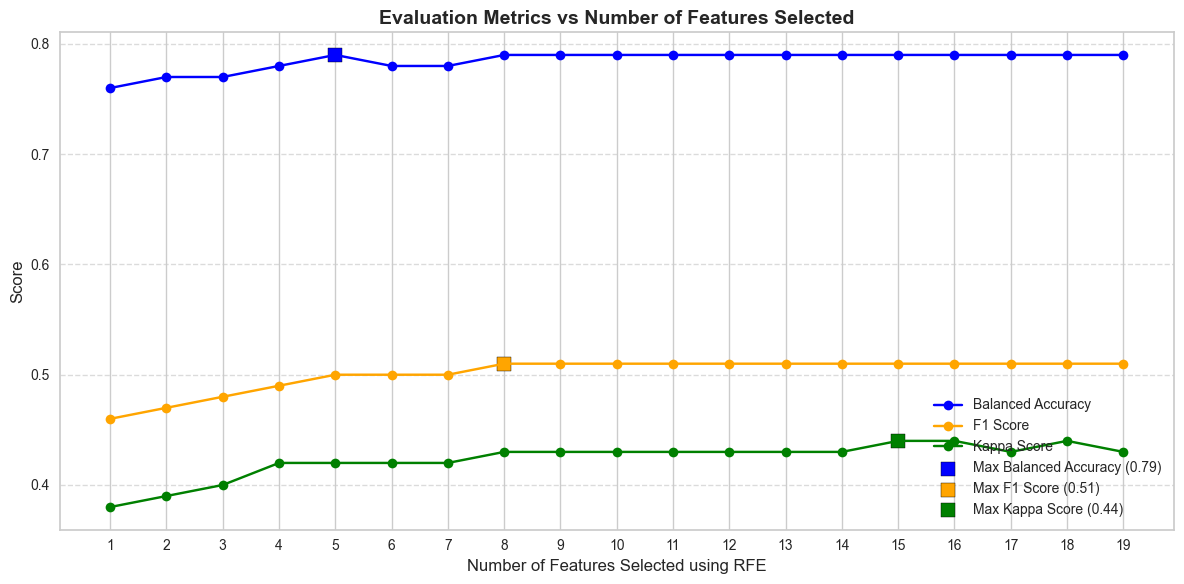

In [23]:
plt.figure(figsize=(12, 6))

plt.plot(k_list, bal_acc_list, marker='o', label='Balanced Accuracy', color='blue')
plt.plot(k_list, f1_score_list, marker='o', label='F1 Score', color='orange')
plt.plot(k_list, kappa_list, marker='o', label='Kappa Score', color='green')

max_bal_acc = max(bal_acc_list)
max_f1 = max(f1_score_list)
max_kappa = max(kappa_list)

plt.scatter(k_list[np.argmax(bal_acc_list)], max_bal_acc, color='blue', s=100, edgecolor='black', label=f'Max Balanced Accuracy ({max_bal_acc})', marker='s')
plt.scatter(k_list[np.argmax(f1_score_list)], max_f1, color='orange', s=100, edgecolor='black', label=f'Max F1 Score ({max_f1})', marker='s')
plt.scatter(k_list[np.argmax(kappa_list)], max_kappa, color='green', s=100, edgecolor='black', label=f'Max Kappa Score ({max_kappa})', marker='s')

plt.title('Evaluation Metrics vs Number of Features Selected', fontsize=14, weight='bold')
plt.xlabel('Number of Features Selected using RFE', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(k_list)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(fontsize=10, loc='lower right')

plt.tight_layout()
plt.show()

In [24]:
print('Max Bal Acc:', max_bal_acc)
print('Max F1 score:', max_f1)
print('Max kappa:', max_kappa)

Max Bal Acc: 0.79
Max F1 score: 0.51
Max kappa: 0.44


In [25]:
best_k_using_bal_acc = np.argmax(bal_acc_list) + 1
best_k_using_bal_acc

5

In [26]:
best_k_using_f1 = np.argmax(f1_score_list) + 1
best_k_using_f1

8

In [27]:
selector = SelectKBest(score_func=mutual_info_classif, k=best_k_using_f1)
selector.fit(X_train_adasyn_v3, y_train_adasyn_v3)
selected_feature_mask = selector.get_support()
selected_features = X_train_adasyn_v3.columns[selected_feature_mask]
selected_features

Index(['KALORI_KAP', 'Pengeluaran_Jenis_D', 'Pengeluaran_Jenis_H',
       'Pengeluaran_Jenis_N', 'nilai_bantuan(rp)', 'rataan_beras(rp)',
       'rataan_telur(rp)', 'rataan_lainnya(rp)'],
      dtype='object')

In [32]:
pipeline_svm = Pipeline([
    ('scaler', StandardScaler()),  # Scaling hanya untuk SVM
    ('svm', SVC(kernel='rbf', C=1.31047, gamma=0.0002959, random_state=74, probability=True))
])

stacking_ensemble = StackingClassifier(
    estimators=[
        ('rf', RandomForestClassifier(n_estimators=144, random_state=74, max_depth=38, 
                                      min_samples_split=32, min_samples_leaf=22, 
                                      max_features='log2', max_leaf_nodes=40)),
        ('svm', pipeline_svm)
    ],
    final_estimator=LogisticRegression(penalty='l2', solver='saga', C=0.011136022200791114))

Holdout Evaluation (Train):
Balanced Accuracy: 0.76
Precision: 0.73
F1 Score: 0.68
Kappa: 0.54

Holdout Evaluation (Test):
Balanced Accuracy: 0.78
Precision: 0.39
F1 Score: 0.49
Kappa: 0.42
Sensitivity (Recall): 0.68
Specificity: 0.88


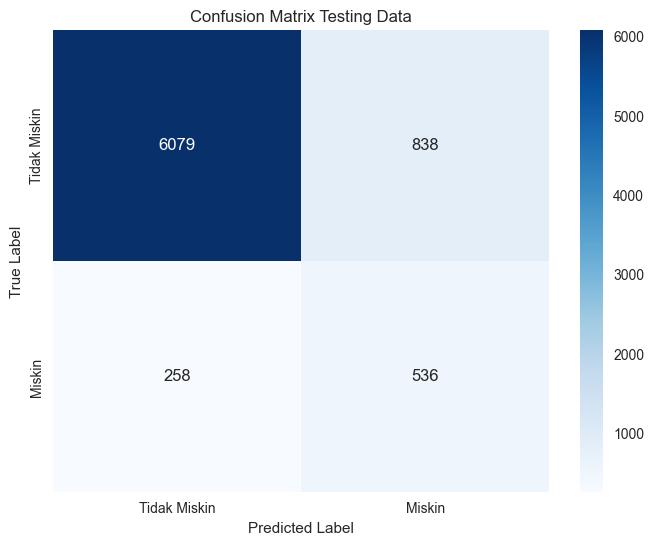

In [33]:
X_train_selected = X_train_adasyn_v3[selected_features]
X_test_selected = X_test_v3[selected_features]

eval_model_holdout(stacking_ensemble, X_train_selected, y_train_adasyn_v3,  
                   X_test_selected, y_test_v3, plot=True)

## Interpretasi

## FE Semua 

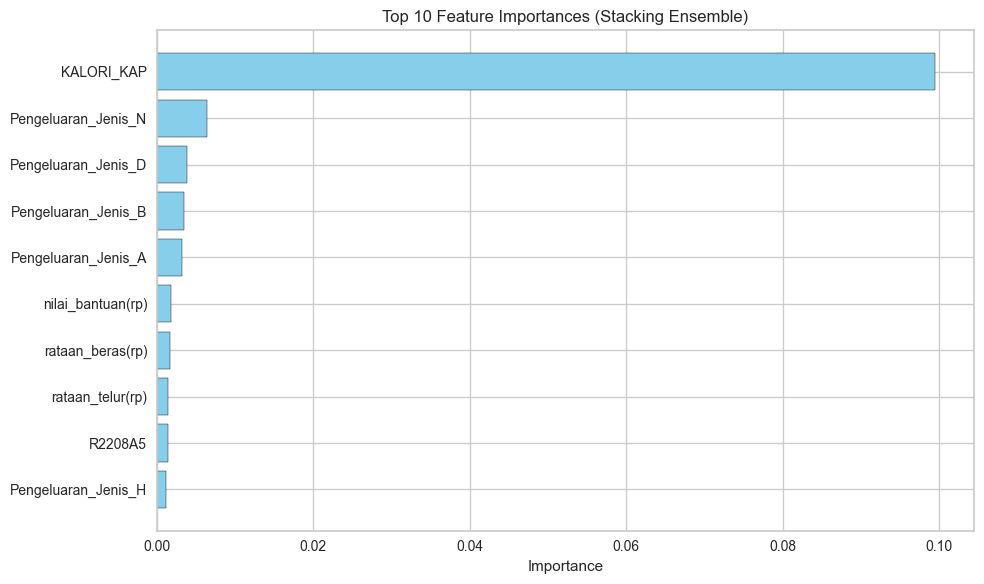

In [31]:
from sklearn.inspection import permutation_importance
stacking_ensemble.fit(X_train_adasyn, y_train_adasyn)

result = permutation_importance(
    stacking_ensemble, X_test, y_test,
    scoring='accuracy', n_repeats=10, random_state=74
)
feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': result.importances_mean
}).sort_values(by='Importance', ascending=False).reset_index(drop=True)

top_10_features = feature_importances.head(10)
plt.figure(figsize=(10, 6))
plt.barh(top_10_features['Feature'], top_10_features['Importance'], align='center', color='skyblue', edgecolor='black')
plt.gca().invert_yaxis()
plt.xlabel('Importance')
plt.title('Top 10 Feature Importances (Stacking Ensemble)')
plt.tight_layout()
plt.show()

## FE - k Fitur F1

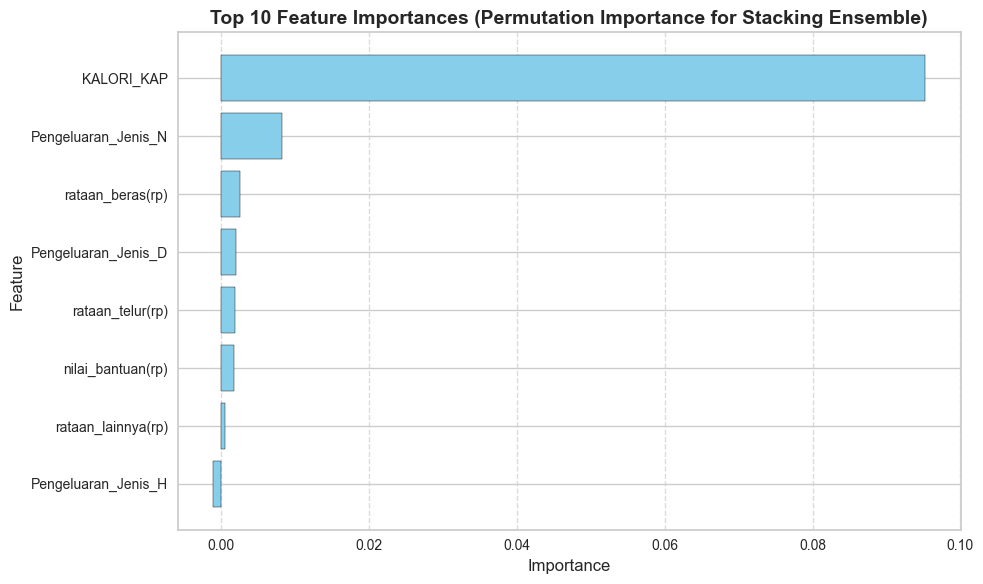

In [34]:
X_train_selected = X_train_adasyn_v3[selected_features]
X_test_selected = X_test_v3[selected_features]
stacking_ensemble.fit(X_train_selected, y_train_adasyn_v3)

result = permutation_importance(
    stacking_ensemble, X_test_selected, y_test_v3,
    scoring='accuracy', n_repeats=10, random_state=74)

feature_importances = pd.DataFrame({
    'Feature': selected_features,  
    'Importance': result.importances_mean  
}).sort_values(by='Importance', ascending=False).reset_index(drop=True)
top_10_features = feature_importances.head(10)

plt.figure(figsize=(10, 6))
plt.barh(top_10_features['Feature'], top_10_features['Importance'], align='center', color='skyblue', edgecolor='black')
plt.gca().invert_yaxis()  
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.title('Top 10 Feature Importances (Permutation Importance for Stacking Ensemble)', fontsize=14, weight='bold')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Skenario 5 (Eval Model) - Balancing

In [5]:
from imblearn.over_sampling import ADASYN

X = df_model.drop(['FOOD_LABEL', 'PROTE_KAP', 'LEMAK_KAP', 'KARBO_KAP'], axis=1)
y = df_model['FOOD_LABEL']

adasyn = ADASYN(random_state=86, sampling_strategy=0.5)
X_adasyn, y_adasyn = adasyn.fit_resample(X, y)
X_adasyn_ori = X_adasyn.copy()
y_adasyn_ori = y_adasyn.copy()

## Def Fungsi - 24

In [ ]:
def eval_model_all_data(model, X, y, plot=False):
    model.fit(X, y)
    y_pred = model.predict(X)

    cm = confusion_matrix(y, y_pred)
    tn, fp, fn, tp = cm.ravel()
    
    sensitivity = tp / (tp + fn) 
    specificity = tn / (tn + fp)  
    precision = precision_score(y, y_pred, zero_division=0)  
    balanced_accuracy = balanced_accuracy_score(y, y_pred)
    f1 = f1_score(y, y_pred)
    kappa = cohen_kappa_score(y, y_pred)

    print("Evaluation (All Data):")
    print("Balanced Accuracy:", round(balanced_accuracy, 2))
    print("Precision:", round(precision, 2))  
    print("F1 Score:", round(f1, 2))
    print("Kappa:", round(kappa, 2))
    print("Sensitivity (Recall):", round(sensitivity, 2))
    print("Specificity:", round(specificity, 2))

    if plot:
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                    xticklabels=['Tidak Miskin', 'Miskin'], yticklabels=['Tidak Miskin', 'Miskin'])
        plt.title('Confusion Matrix (All Data)')
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.show()

In [ ]:
def specificity_score(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()
    return tn / (tn + fp)

specificity_scorer = make_scorer(specificity_score)
sensitivity_scorer = make_scorer(recall_score)
precision_scorer = make_scorer(precision_score, zero_division=0)

def eval_model_CV_with_adasyn_fixed(model, X, y):
    pipeline = Pipeline([
        ('adasyn', ADASYN(random_state=74, sampling_strategy=0.5)),
        ('model', model)
    ])
    
    cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=74)
    cv_results = cross_validate(
        pipeline, X, y, cv=cv, 
        scoring={
            'balanced_accuracy': 'balanced_accuracy',
            'f1': 'f1',
            'kappa': make_scorer(cohen_kappa_score),
            'sensitivity': sensitivity_scorer,
            'specificity': specificity_scorer,
            'precision': precision_scorer
        },
        return_train_score=False
    )
    
    mean_bal_acc = round(np.mean(cv_results['test_balanced_accuracy']), 2)
    mean_f1 = round(np.mean(cv_results['test_f1']), 2)
    mean_kappa = round(np.mean(cv_results['test_kappa']), 2)
    mean_sensitivity = round(np.mean(cv_results['test_sensitivity']), 2)
    mean_specificity = round(np.mean(cv_results['test_specificity']), 2)
    mean_precision = round(np.mean(cv_results['test_precision']), 2)

    print('Mean Balanced Accuracy (CV):', mean_bal_acc)
    print('Mean F1 Score (CV):', mean_f1)
    print('Mean Kappa (CV):', mean_kappa)
    print('Mean Sensitivity (CV):', mean_sensitivity)
    print('Mean Specificity (CV):', mean_specificity)
    print('Mean Precision (CV):', mean_precision)

In [ ]:
def mergeXy_for_CV(X, y):
    merge_X = X
    merge_y = y.tolist()
    return merge_X, merge_y

In [ ]:
def objective_rf(trial):
    n_estimators = trial.suggest_int('n_estimators', 100, 1000)
    max_depth = trial.suggest_int('max_depth', 5, 50)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 32)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 32)
    max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2'])
    max_leaf_nodes = trial.suggest_int('max_leaf_nodes', 10, 100, step=10)
    class_weight = trial.suggest_categorical('class_weight', [None, 'balanced', 'balanced_subsample'])

    # Model RandomForestClassifier
    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        max_leaf_nodes=max_leaf_nodes,
        class_weight=class_weight,
        random_state=74
    )
    
    score = cross_val_score(model, X_adasyn, y_adasyn, cv=10, scoring='f1').mean()
    return score

# Optimasi untuk Random Forest menggunakan Optuna
study_rf = optuna.create_study(direction='maximize', sampler=optuna.samplers.RandomSampler(seed=74))
study_rf.optimize(objective_rf, n_trials=100)

print("Best trial for Random Forest:")
trial_rf = study_rf.best_trial
print("Value: {:.4f}".format(trial_rf.value))
print("Params: ")
for key, value in trial_rf.params.items():
    print("    {}: {}".format(key, value))

[I 2024-12-02 09:13:53,069] A new study created in memory with name: no-name-53ee1d7f-41bb-4d64-89ae-7a3580390da7
[I 2024-12-02 09:14:24,401] Trial 0 finished with value: 0.785753232144475 and parameters: {'n_estimators': 282, 'max_depth': 41, 'min_samples_split': 28, 'min_samples_leaf': 11, 'max_features': 'log2', 'max_leaf_nodes': 80, 'class_weight': 'balanced'}. Best is trial 0 with value: 0.785753232144475.
[I 2024-12-02 09:16:31,619] Trial 1 finished with value: 0.7857340537517683 and parameters: {'n_estimators': 883, 'max_depth': 26, 'min_samples_split': 4, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_leaf_nodes': 80, 'class_weight': 'balanced_subsample'}. Best is trial 0 with value: 0.785753232144475.
[I 2024-12-02 09:16:49,980] Trial 2 finished with value: 0.7837346802992269 and parameters: {'n_estimators': 126, 'max_depth': 29, 'min_samples_split': 26, 'min_samples_leaf': 26, 'max_features': 'log2', 'max_leaf_nodes': 90, 'class_weight': 'balanced_subsample'}. Best is tr

Best trial for Random Forest:
Value: 0.7885
Params: 
    n_estimators: 550
    max_depth: 34
    min_samples_split: 28
    min_samples_leaf: 1
    max_features: log2
    max_leaf_nodes: 100
    class_weight: balanced_subsample


In [ ]:
def objective_svm_all_data(trial):
    C = trial.suggest_float('C', 0.1, 100.0, log=True)  
    gamma = trial.suggest_float('gamma', 1e-4, 1e-1, log=True)  
    class_weight = trial.suggest_categorical('class_weight', [None, 'balanced'])

    model = SVC(
        kernel='rbf',
        C=C,
        gamma=gamma,
        class_weight=class_weight,
        random_state=74
    )
    model.fit(X_adasyn, y_adasyn)  
    y_pred = model.predict(X_adasyn) 

    score = f1_score(y_adasyn, y_pred)
    return score

# Optimasi untuk SVM menggunakan seluruh data
study_svm_all_data = optuna.create_study(direction='maximize', sampler=optuna.samplers.RandomSampler(seed=74))
study_svm_all_data.optimize(objective_svm_all_data, n_trials=50)

print("Best trial for SVM (All Data):")
trial_svm_all_data = study_svm_all_data.best_trial
print("Value: {:.4f}".format(trial_svm_all_data.value))
print("Params: ")
for key, value in trial_svm_all_data.params.items():
    print("    {}: {}".format(key, value))

[I 2024-12-02 10:48:57,095] A new study created in memory with name: no-name-6b84586a-ae72-44a0-b986-2c46779aa3a4
[I 2024-12-02 10:51:34,914] Trial 0 finished with value: 0.5895336418654326 and parameters: {'C': 0.4042098387048983, 'gamma': 0.022575782499416518, 'class_weight': None}. Best is trial 0 with value: 0.5895336418654326.
[I 2024-12-02 10:53:53,626] Trial 1 finished with value: 0.6351425030978934 and parameters: {'C': 0.5579322021036928, 'gamma': 0.026983056872895872, 'class_weight': None}. Best is trial 1 with value: 0.6351425030978934.
[I 2024-12-02 10:58:03,900] Trial 2 finished with value: 0.7900233019763528 and parameters: {'C': 13.535483415980607, 'gamma': 0.00021812358426198786, 'class_weight': None}. Best is trial 2 with value: 0.7900233019763528.
[I 2024-12-02 11:00:12,698] Trial 3 finished with value: 0.5360020795425007 and parameters: {'C': 0.1741055609747699, 'gamma': 0.00027945467914323194, 'class_weight': None}. Best is trial 2 with value: 0.7900233019763528.
[I

Best trial for SVM (All Data):
Value: 0.9361
Params: 
    C: 15.686470950312208
    gamma: 0.048871394693884754
    class_weight: None


In [16]:
def objective_logistic_all_data(trial):
    penalty = trial.suggest_categorical('penalty', ['l1', 'l2', 'elasticnet', None]) 
    solver = trial.suggest_categorical('solver', ['lbfgs', 'saga', 'liblinear'])

    if penalty == 'l1' and solver not in ['liblinear', 'saga']:
        raise optuna.exceptions.TrialPruned()
    if penalty == 'elasticnet' and solver != 'saga':
        raise optuna.exceptions.TrialPruned()
    if penalty is None and solver not in ['lbfgs', 'saga']:
        raise optuna.exceptions.TrialPruned()
    
    C = trial.suggest_float('C', 0.01, 10.0, log=True)
    l1_ratio = None
    if penalty == 'elasticnet': 
        l1_ratio = trial.suggest_float('l1_ratio', 0.0, 1.0)
  
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('logreg', LogisticRegression(
            penalty=penalty,
            solver=solver,
            C=C,
            l1_ratio=l1_ratio,
            random_state=74,
            max_iter=1000
        ))
    ])
    
    pipeline.fit(X_adasyn, y_adasyn) 
    y_pred = pipeline.predict(X_adasyn) 
    score = f1_score(y_adasyn, y_pred)
    return score

study_logreg_all_data = optuna.create_study(direction='maximize', sampler=optuna.samplers.RandomSampler(seed=74))
study_logreg_all_data.optimize(objective_logistic_all_data, n_trials=100)

print("Best trial for Logistic Regression (All Data):")
trial_logreg_all_data = study_logreg_all_data.best_trial
print("Value: {:.4f}".format(trial_logreg_all_data.value))
print("Params: ")
for key, value in trial_logreg_all_data.params.items():
    print("    {}: {}".format(key, value))

[I 2024-12-02 13:45:45,457] A new study created in memory with name: no-name-aff29ddf-d30e-45ec-b20b-fed2ef6fc280
[I 2024-12-02 13:45:45,660] Trial 0 finished with value: 0.7730146962627011 and parameters: {'penalty': 'elasticnet', 'solver': 'saga', 'C': 0.9637962676359452, 'l1_ratio': 0.7104912570295666}. Best is trial 0 with value: 0.7730146962627011.
[I 2024-12-02 13:45:45,853] Trial 1 finished with value: 0.773135630178805 and parameters: {'penalty': 'l2', 'solver': 'saga', 'C': 1.4146213822127405}. Best is trial 1 with value: 0.773135630178805.
[I 2024-12-02 13:45:45,855] Trial 2 pruned. 
[I 2024-12-02 13:45:45,855] Trial 3 pruned. 
[I 2024-12-02 13:45:45,855] Trial 4 pruned. 
c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
[I 2024-12-02 13:45:45,941] Trial 5 finished with value: 0.7731554160125589 and parameters: {'penalty'

Best trial for Logistic Regression (All Data):
Value: 0.7744
Params: 
    penalty: l1
    solver: liblinear
    C: 0.014421873628989794


## Stacking - 24

In [ ]:
# Pipeline RF
pipeline_rf = Pipeline([
    ('rf', RandomForestClassifier(n_estimators=550, max_depth=34, min_samples_split=28, min_samples_leaf=1,max_features='log2', max_leaf_nodes=100,           
                                  class_weight='balanced_subsample',random_state=74))
])

# Pipeline SVM RBF
pipeline_svm = Pipeline([
    ('scaler', StandardScaler()),  
    ('svm', SVC(kernel='rbf', C=15.686470950312208, gamma=0.048871394693884754, class_weight=None, random_state=74, probability=True))
])

Evaluation (All Data):
Balanced Accuracy: 0.87
Precision: 0.83
F1 Score: 0.82
Kappa: 0.73
Sensitivity (Recall): 0.82
Specificity: 0.91


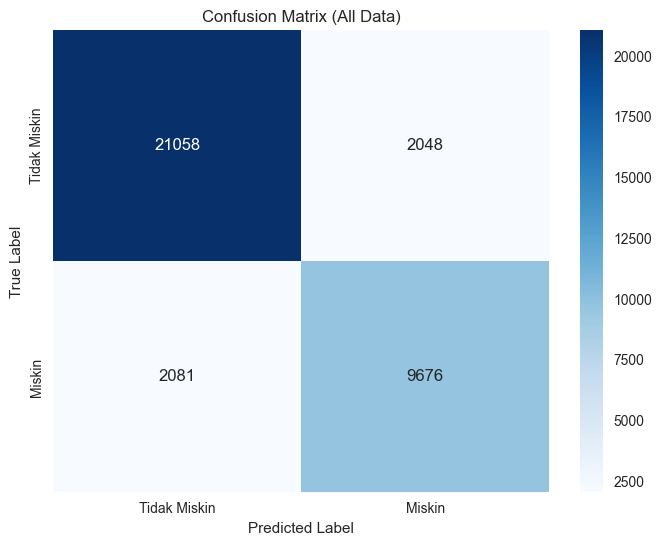

In [19]:
stacking_ensemble = StackingClassifier(
    estimators=[
        ('rf', pipeline_rf),
        ('svm', pipeline_svm)
    ],
    final_estimator=LogisticRegression(penalty='l1', solver='liblinear', C=0.014421873628989794, random_state=74))
eval_model_all_data(stacking_ensemble, X_adasyn_ori, y_adasyn, plot=True)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_18916\612195094.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')


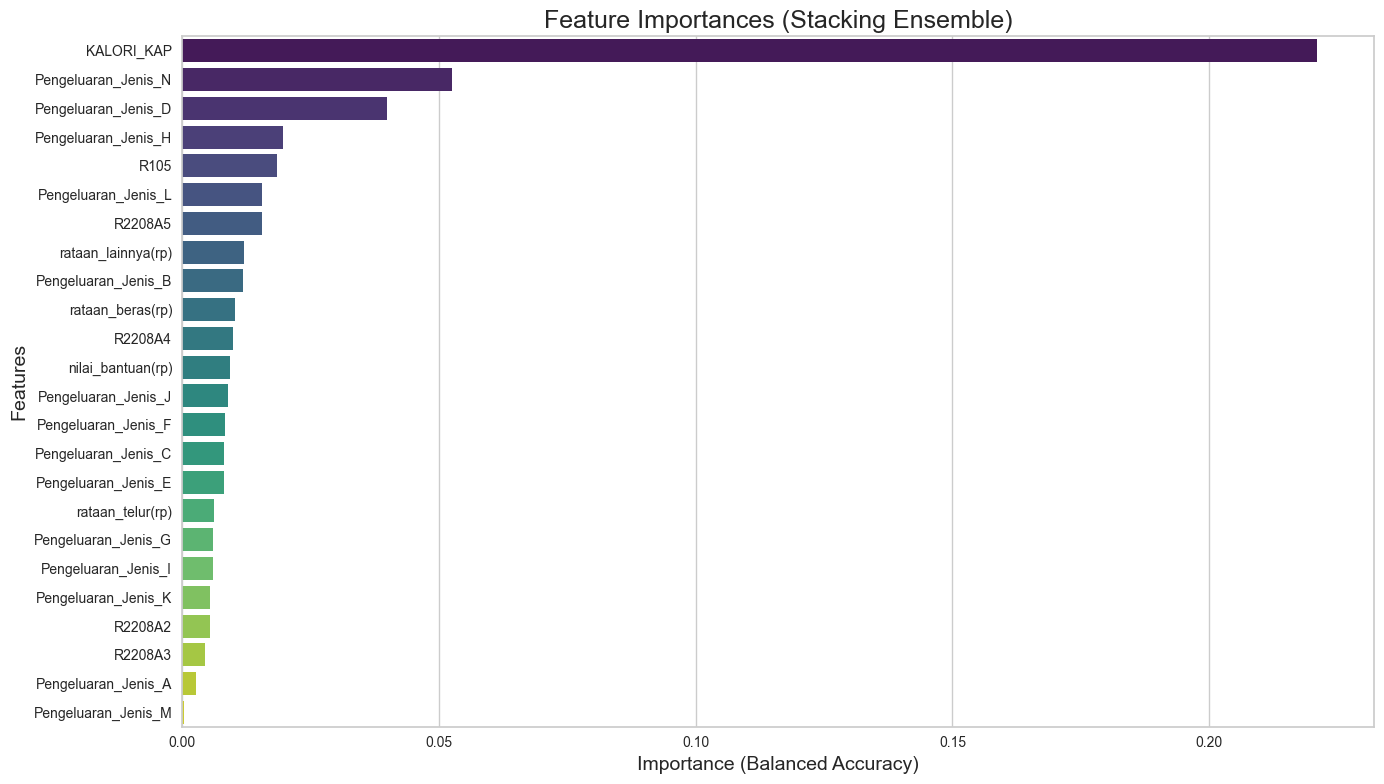

In [21]:
from sklearn.inspection import permutation_importance

stacking_ensemble.fit(X_adasyn, y_adasyn)
result = permutation_importance(
    stacking_ensemble, X_adasyn, y_adasyn, 
    scoring='balanced_accuracy', n_repeats=10, random_state=74)


feature_importances = pd.DataFrame({
    'Feature': X_adasyn.columns,  
    'Importance': result.importances_mean  
}).sort_values(by='Importance', ascending=False).reset_index(drop=True)


plt.figure(figsize=(14, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')
plt.title('Feature Importances (Stacking Ensemble)', fontsize=18)
plt.xlabel('Importance (Balanced Accuracy)', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.tight_layout() 
plt.show()

## Def Fungsi - 8

In [23]:
X_adasyn_ori = X_adasyn[['KALORI_KAP', 'Pengeluaran_Jenis_D', 'Pengeluaran_Jenis_H',
                     'Pengeluaran_Jenis_N', 'nilai_bantuan(rp)', 'rataan_beras(rp)',
                     'rataan_telur(rp)', 'rataan_lainnya(rp)']].copy()
y_adasyn_ori = y_adasyn.copy()

In [ ]:
def eval_model_all_data(model, X, y, plot=False):
    model.fit(X, y)
    y_pred = model.predict(X)
    
    cm = confusion_matrix(y, y_pred)
    tn, fp, fn, tp = cm.ravel()
    
    sensitivity = tp / (tp + fn) 
    specificity = tn / (tn + fp) 
    precision = precision_score(y, y_pred, zero_division=0)  
    balanced_accuracy = balanced_accuracy_score(y, y_pred)
    f1 = f1_score(y, y_pred)
    kappa = cohen_kappa_score(y, y_pred)

    print("Evaluation (All Data):")
    print("Balanced Accuracy:", round(balanced_accuracy, 2))
    print("Precision:", round(precision, 2))  
    print("F1 Score:", round(f1, 2))
    print("Kappa:", round(kappa, 2))
    print("Sensitivity (Recall):", round(sensitivity, 2))
    print("Specificity:", round(specificity, 2))

    if plot:
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                    xticklabels=['Tidak Miskin', 'Miskin'], yticklabels=['Tidak Miskin', 'Miskin'])
        plt.title('Confusion Matrix (All Data)')
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.show()

In [ ]:
def specificity_score(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()
    return tn / (tn + fp)

specificity_scorer = make_scorer(specificity_score)
sensitivity_scorer = make_scorer(recall_score)
precision_scorer = make_scorer(precision_score, zero_division=0)

def eval_model_CV_with_adasyn_fixed(model, X, y):
    pipeline = Pipeline([
        ('adasyn', ADASYN(random_state=74, sampling_strategy=0.5)),
        ('model', model)
    ])
    
    cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=74)
    cv_results = cross_validate(
        pipeline, X, y, cv=cv, 
        scoring={
            'balanced_accuracy': 'balanced_accuracy',
            'f1': 'f1',
            'kappa': make_scorer(cohen_kappa_score),
            'sensitivity': sensitivity_scorer,
            'specificity': specificity_scorer,
            'precision': precision_scorer
        },
        return_train_score=False)
    
    mean_bal_acc = round(np.mean(cv_results['test_balanced_accuracy']), 2)
    mean_f1 = round(np.mean(cv_results['test_f1']), 2)
    mean_kappa = round(np.mean(cv_results['test_kappa']), 2)
    mean_sensitivity = round(np.mean(cv_results['test_sensitivity']), 2)
    mean_specificity = round(np.mean(cv_results['test_specificity']), 2)
    mean_precision = round(np.mean(cv_results['test_precision']), 2)
    
    print('Mean Balanced Accuracy (CV):', mean_bal_acc)
    print('Mean F1 Score (CV):', mean_f1)
    print('Mean Kappa (CV):', mean_kappa)
    print('Mean Sensitivity (CV):', mean_sensitivity)
    print('Mean Specificity (CV):', mean_specificity)
    print('Mean Precision (CV):', mean_precision)

In [ ]:
def mergeXy_for_CV(X, y):
    merge_X = X
    merge_y = y.tolist()
    return merge_X, merge_y

## Stacking - 8

In [28]:
# Pipeline RF
pipeline_rf = Pipeline([
    ('rf', RandomForestClassifier(n_estimators=550, max_depth=34, min_samples_split=28, min_samples_leaf=1,max_features='log2', max_leaf_nodes=100,           
                                  class_weight='balanced_subsample',random_state=74))
])

# Pipeline SVM RBF
pipeline_svm = Pipeline([
    ('scaler', StandardScaler()),  
    ('svm', SVC(kernel='rbf', C=15.686470950312208, gamma=0.048871394693884754, class_weight=None, random_state=74, probability=True))
])

Evaluation (All Data):
Balanced Accuracy: 0.84
Precision: 0.76
F1 Score: 0.79
Kappa: 0.67
Sensitivity (Recall): 0.82
Specificity: 0.87


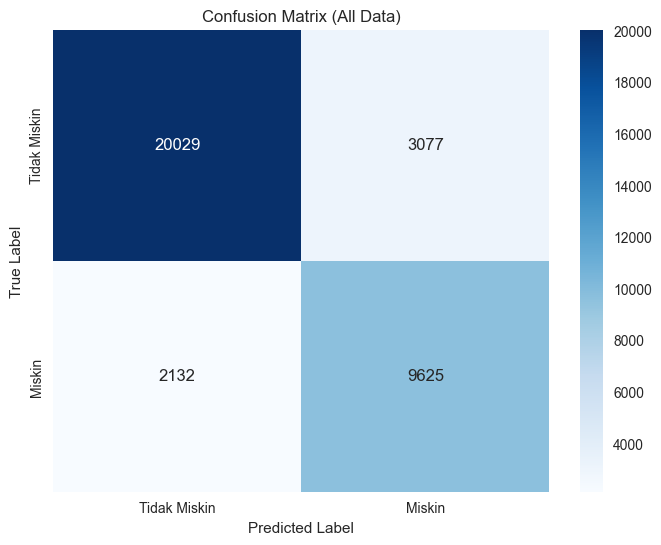

In [29]:
stacking_ensemble = StackingClassifier(
    estimators=[
        ('rf', pipeline_rf),
        ('svm', pipeline_svm)
    ],
    final_estimator=LogisticRegression(penalty='l1', solver='liblinear', C=0.014421873628989794, random_state=74))
eval_model_all_data(stacking_ensemble, X_adasyn_ori, y_adasyn, plot=True)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_18916\245600934.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')


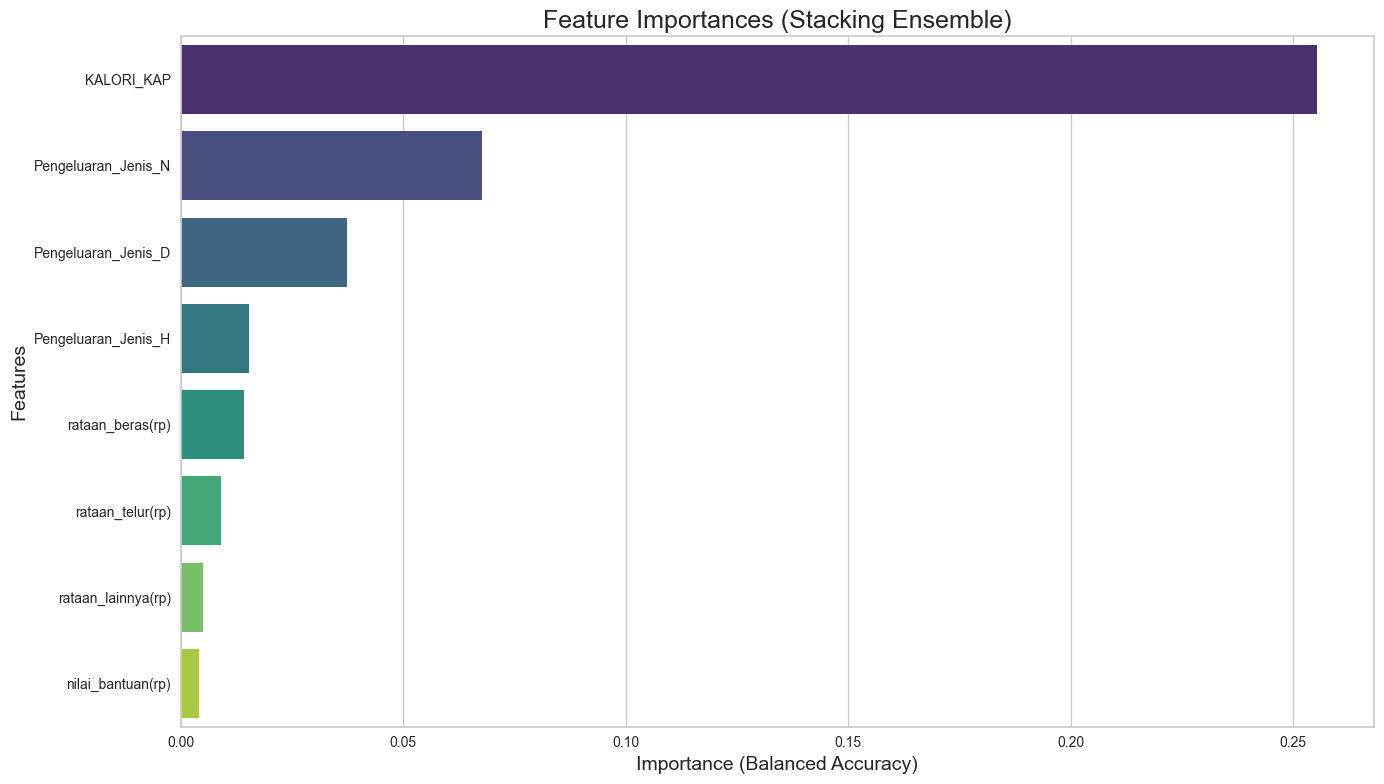

In [30]:
stacking_ensemble.fit(X_adasyn_ori, y_adasyn)

result = permutation_importance(
    stacking_ensemble, X_adasyn_ori, y_adasyn, 
    scoring='balanced_accuracy', n_repeats=5, random_state=74)

feature_importances = pd.DataFrame({
    'Feature': X_adasyn_ori.columns,  
    'Importance': result.importances_mean  
}).sort_values(by='Importance', ascending=False).reset_index(drop=True)

plt.figure(figsize=(14, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')
plt.title('Feature Importances (Stacking Ensemble)', fontsize=18)
plt.xlabel('Importance (Balanced Accuracy)', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.tight_layout() 
plt.show()

# Skenario 6 (Eval Model) - Asli

In [31]:
X = df_model.drop(['FOOD_LABEL', 'PROTE_KAP', 'LEMAK_KAP', 'KARBO_KAP'], axis=1)
y = df_model['FOOD_LABEL']

X_ori = X.copy()
y_ori = y.copy()

## Def Fungsi - 24

In [ ]:
def eval_model_all_data(model, X, y, plot=False):
    model.fit(X, y)
    y_pred = model.predict(X)

    cm = confusion_matrix(y, y_pred)
    tn, fp, fn, tp = cm.ravel()
    
    sensitivity = tp / (tp + fn) 
    specificity = tn / (tn + fp) 
    precision = precision_score(y, y_pred, zero_division=0)  
    balanced_accuracy = balanced_accuracy_score(y, y_pred)
    f1 = f1_score(y, y_pred)
    kappa = cohen_kappa_score(y, y_pred)

    print("Evaluation (All Data):")
    print("Balanced Accuracy:", round(balanced_accuracy, 2))
    print("Precision:", round(precision, 2))  
    print("F1 Score:", round(f1, 2))
    print("Kappa:", round(kappa, 2))
    print("Sensitivity (Recall):", round(sensitivity, 2))
    print("Specificity:", round(specificity, 2))

    if plot:
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                    xticklabels=['Tidak Miskin', 'Miskin'], yticklabels=['Tidak Miskin', 'Miskin'])
        plt.title('Confusion Matrix (All Data)')
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.show()

In [ ]:
def specificity_score(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()
    return tn / (tn + fp)

specificity_scorer = make_scorer(specificity_score)
sensitivity_scorer = make_scorer(recall_score)
precision_scorer = make_scorer(precision_score, zero_division=0)

def eval_model_CV_with_data_asli(model, X, y):
    pipeline = Pipeline([
        ('model', model)
    ])
    
    cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=74)
    cv_results = cross_validate(
        pipeline, X, y, cv=cv, 
        scoring={
            'balanced_accuracy': 'balanced_accuracy',
            'f1': 'f1',
            'kappa': make_scorer(cohen_kappa_score),
            'sensitivity': sensitivity_scorer,
            'specificity': specificity_scorer,
            'precision': precision_scorer
        },
        return_train_score=False)
    

    mean_bal_acc = round(np.mean(cv_results['test_balanced_accuracy']), 2)
    mean_f1 = round(np.mean(cv_results['test_f1']), 2)
    mean_kappa = round(np.mean(cv_results['test_kappa']), 2)
    mean_sensitivity = round(np.mean(cv_results['test_sensitivity']), 2)
    mean_specificity = round(np.mean(cv_results['test_specificity']), 2)
    mean_precision = round(np.mean(cv_results['test_precision']), 2)
    
    print("Hasil Evaluasi Model (Cross-Validation):")
    print("Balanced Accuracy:", mean_bal_acc)
    print("F1 Score:", mean_f1)
    print("Kappa:", mean_kappa)
    print("Sensitivity (Recall):", mean_sensitivity)
    print("Specificity:", mean_specificity)
    print("Precision:", mean_precision)

In [ ]:
def mergeXy_for_CV(X, y):
    merge_X = X
    merge_y = y.tolist()
    return merge_X, merge_y

In [35]:
def objective_rf(trial):
    n_estimators = trial.suggest_int('n_estimators', 100, 1000)
    max_depth = trial.suggest_int('max_depth', 5, 50)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 32)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 32)
    max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2'])
    max_leaf_nodes = trial.suggest_int('max_leaf_nodes', 10, 100, step=10)
    class_weight = trial.suggest_categorical('class_weight', [None, 'balanced', 'balanced_subsample'])

    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        max_leaf_nodes=max_leaf_nodes,
        class_weight=class_weight,
        random_state=74)

    score = cross_val_score(model, X, y, cv=10, scoring='f1').mean()
    return score

# Optimasi untuk Random Forest menggunakan Optuna
study_rf = optuna.create_study(direction='maximize', sampler=optuna.samplers.RandomSampler(seed=74))
study_rf.optimize(objective_rf, n_trials=50)

print("Best trial for Random Forest:")
trial_rf = study_rf.best_trial
print("Value: {:.4f}".format(trial_rf.value))
print("Params: ")
for key, value in trial_rf.params.items():
    print("    {}: {}".format(key, value))

[I 2024-12-02 19:52:48,541] A new study created in memory with name: no-name-d9c3e806-f2dc-46cc-a978-d108b925d536
[I 2024-12-02 19:53:13,911] Trial 0 finished with value: 0.47333970735547315 and parameters: {'n_estimators': 282, 'max_depth': 41, 'min_samples_split': 28, 'min_samples_leaf': 11, 'max_features': 'log2', 'max_leaf_nodes': 80, 'class_weight': 'balanced'}. Best is trial 0 with value: 0.47333970735547315.
[I 2024-12-02 19:54:53,118] Trial 1 finished with value: 0.47553578772419847 and parameters: {'n_estimators': 883, 'max_depth': 26, 'min_samples_split': 4, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_leaf_nodes': 80, 'class_weight': 'balanced_subsample'}. Best is trial 1 with value: 0.47553578772419847.
[I 2024-12-02 19:55:07,507] Trial 2 finished with value: 0.4721765792348161 and parameters: {'n_estimators': 126, 'max_depth': 29, 'min_samples_split': 26, 'min_samples_leaf': 26, 'max_features': 'log2', 'max_leaf_nodes': 90, 'class_weight': 'balanced_subsample'}. Bes

Best trial for Random Forest:
Value: 0.4766
Params: 
    n_estimators: 881
    max_depth: 50
    min_samples_split: 20
    min_samples_leaf: 5
    max_features: sqrt
    max_leaf_nodes: 90
    class_weight: balanced_subsample


In [36]:
def objective_svm_all_data(trial):
    C = trial.suggest_float('C', 0.1, 100.0, log=True) 
    gamma = trial.suggest_float('gamma', 1e-4, 1e-1, log=True) 
    class_weight = trial.suggest_categorical('class_weight', [None, 'balanced'])

    model = SVC(
        kernel='rbf',
        C=C,
        gamma=gamma,
        class_weight=class_weight,
        random_state=74)

    model.fit(X, y) 
    y_pred = model.predict(X)
    score = f1_score(y, y_pred)
    return score

# Optimasi untuk SVM menggunakan seluruh data
study_svm_all_data = optuna.create_study(direction='maximize', sampler=optuna.samplers.RandomSampler(seed=74))
study_svm_all_data.optimize(objective_svm_all_data, n_trials=25)

print("Best trial for SVM (All Data):")
trial_svm_all_data = study_svm_all_data.best_trial
print("Value: {:.4f}".format(trial_svm_all_data.value))
print("Params: ")
for key, value in trial_svm_all_data.params.items():
    print("    {}: {}".format(key, value))

[I 2024-12-02 20:30:13,161] A new study created in memory with name: no-name-699e2545-4fb8-465d-bf4e-02cd5bc3303b
[I 2024-12-02 20:31:50,465] Trial 0 finished with value: 0.2204155374887082 and parameters: {'C': 0.4042098387048983, 'gamma': 0.022575782499416518, 'class_weight': None}. Best is trial 0 with value: 0.2204155374887082.
[I 2024-12-02 20:33:24,032] Trial 1 finished with value: 0.23704586063132818 and parameters: {'C': 0.5579322021036928, 'gamma': 0.026983056872895872, 'class_weight': None}. Best is trial 1 with value: 0.23704586063132818.
[I 2024-12-02 20:34:36,535] Trial 2 finished with value: 0.5551651440618411 and parameters: {'C': 13.535483415980607, 'gamma': 0.00021812358426198786, 'class_weight': None}. Best is trial 2 with value: 0.5551651440618411.
[I 2024-12-02 20:35:25,691] Trial 3 finished with value: 0.2482837528604119 and parameters: {'C': 0.1741055609747699, 'gamma': 0.00027945467914323194, 'class_weight': None}. Best is trial 2 with value: 0.5551651440618411.


Best trial for SVM (All Data):
Value: 0.7205
Params: 
    C: 3.732313592911289
    gamma: 0.08651878275701119
    class_weight: balanced


In [37]:
def objective_logistic_all_data(trial):
    penalty = trial.suggest_categorical('penalty', ['l1', 'l2', 'elasticnet', None]) 
    solver = trial.suggest_categorical('solver', ['lbfgs', 'saga', 'liblinear'])

    if penalty == 'l1' and solver not in ['liblinear', 'saga']:
        raise optuna.exceptions.TrialPruned()
    if penalty == 'elasticnet' and solver != 'saga':
        raise optuna.exceptions.TrialPruned()
    if penalty is None and solver not in ['lbfgs', 'saga']:
        raise optuna.exceptions.TrialPruned()
    
    C = trial.suggest_float('C', 0.01, 10.0, log=True)
    l1_ratio = None
    if penalty == 'elasticnet':
        l1_ratio = trial.suggest_float('l1_ratio', 0.0, 1.0)
 
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('logreg', LogisticRegression(
            penalty=penalty,
            solver=solver,
            C=C,
            l1_ratio=l1_ratio,
            random_state=74,
            max_iter=1000
        ))
    ])

    pipeline.fit(X, y) 
    y_pred = pipeline.predict(X) 
    score = f1_score(y, y_pred)
    return score

# Optimasi untuk Logistic Regression menggunakan seluruh data asli
study_logreg_all_data = optuna.create_study(direction='maximize', sampler=optuna.samplers.RandomSampler(seed=74))
study_logreg_all_data.optimize(objective_logistic_all_data, n_trials=50)

print("Best trial for Logistic Regression (All Data):")
trial_logreg_all_data = study_logreg_all_data.best_trial
print("Value: {:.4f}".format(trial_logreg_all_data.value))
print("Params: ")
for key, value in trial_logreg_all_data.params.items():
    print("    {}: {}".format(key, value))

[I 2024-12-02 21:10:54,771] A new study created in memory with name: no-name-38f23d71-57f7-4095-b14f-c59b6220725d
[I 2024-12-02 21:10:54,978] Trial 0 finished with value: 0.44193857965451055 and parameters: {'penalty': 'elasticnet', 'solver': 'saga', 'C': 0.9637962676359452, 'l1_ratio': 0.7104912570295666}. Best is trial 0 with value: 0.44193857965451055.
[I 2024-12-02 21:10:55,158] Trial 1 finished with value: 0.44268585131894483 and parameters: {'penalty': 'l2', 'solver': 'saga', 'C': 1.4146213822127405}. Best is trial 1 with value: 0.44268585131894483.
[I 2024-12-02 21:10:55,158] Trial 2 pruned. 
[I 2024-12-02 21:10:55,159] Trial 3 pruned. 
[I 2024-12-02 21:10:55,160] Trial 4 pruned. 
c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
[I 2024-12-02 21:10:55,215] Trial 5 finished with value: 0.4430592184128506 and parameters: {'pe

Best trial for Logistic Regression (All Data):
Value: 0.4431
Params: 
    penalty: None
    solver: lbfgs
    C: 0.04568626822393455


## Stakcing - 24

In [ ]:
# Pipeline untuk RandomForest (RF)
pipeline_rf = Pipeline([
    ('rf', RandomForestClassifier(n_estimators=881, max_depth=50, min_samples_split=20, min_samples_leaf=5, max_features='sqrt', max_leaf_nodes=90,           
                                  class_weight='balanced_subsample', random_state=74))
])

# Pipeline untuk SVM (RBF)
pipeline_svm = Pipeline([
    ('scaler', StandardScaler()),  
    ('svm', SVC(
        kernel='rbf',
        C=3.732313592911289,       
        gamma=0.08651878275701119,  
        class_weight='balanced',    
        random_state=74,
        probability=True
    ))
])

Evaluation (All Data):
Balanced Accuracy: 0.68
Precision: 0.71
F1 Score: 0.49
Kappa: 0.45
Sensitivity (Recall): 0.37
Specificity: 0.98


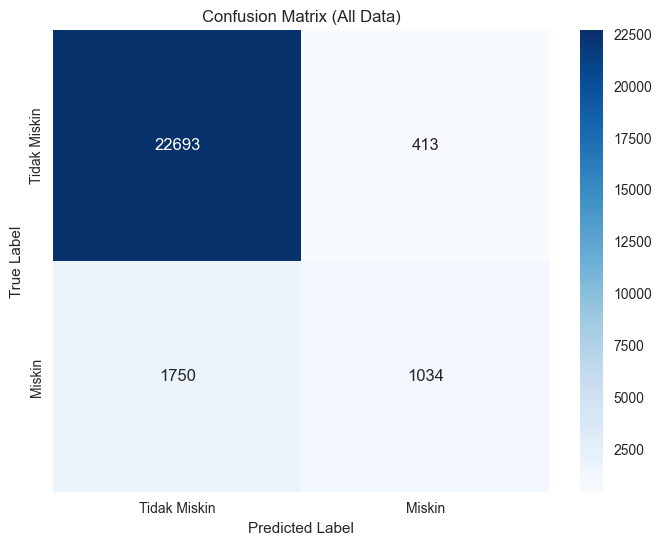

In [44]:
stacking_ensemble = StackingClassifier(
    estimators=[
        ('rf', pipeline_rf),
        ('svm', pipeline_svm)],
    final_estimator=LogisticRegression(penalty='elasticnet', solver='saga', C=2.6020327320478085, l1_ratio= 0.30626366615923717, random_state=74))
eval_model_all_data(stacking_ensemble, X, y, plot=True)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_18916\2086228146.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')


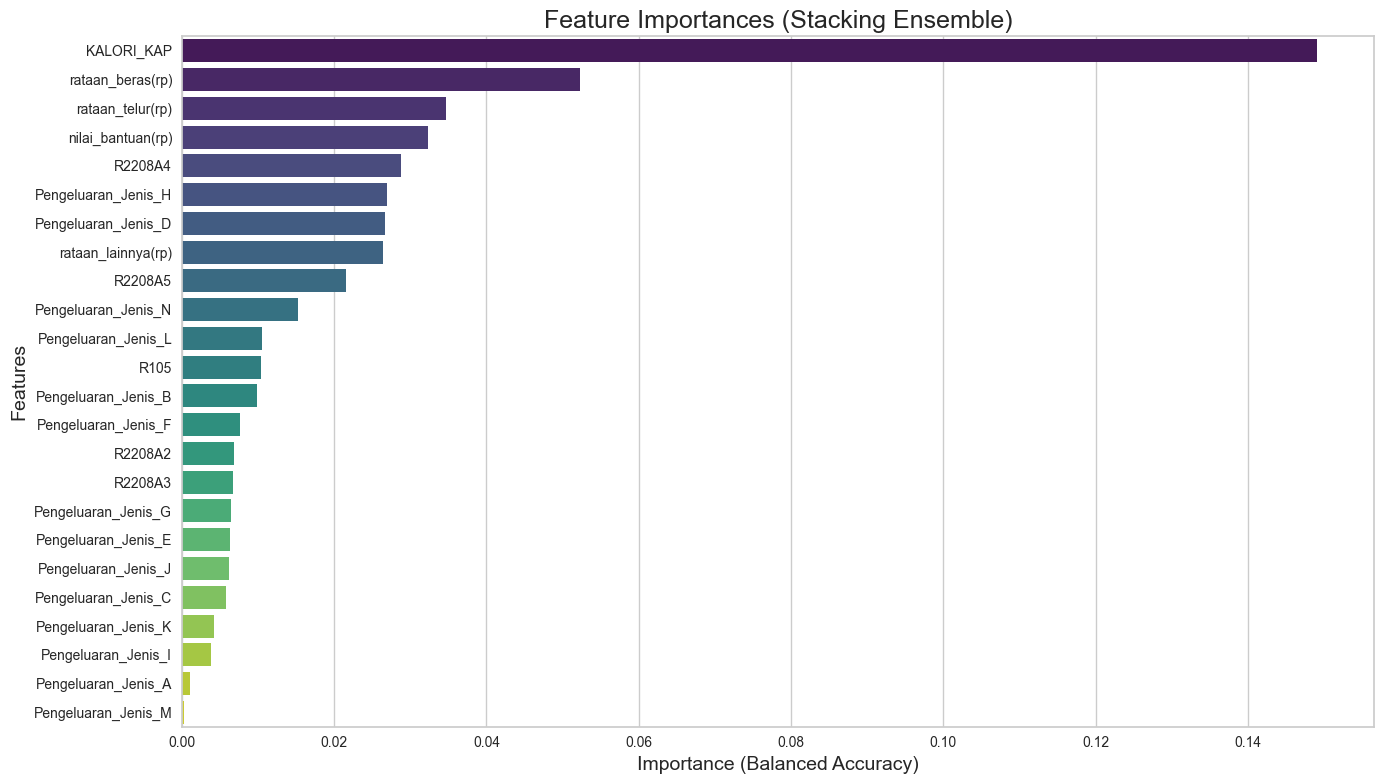

In [45]:
stacking_ensemble.fit(X, y)  
result = permutation_importance(
    stacking_ensemble, X, y, 
    scoring='balanced_accuracy', n_repeats=5, random_state=74)

feature_importances = pd.DataFrame({
    'Feature': X.columns, 
    'Importance': result.importances_mean  
}).sort_values(by='Importance', ascending=False).reset_index(drop=True)

plt.figure(figsize=(14, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')
plt.title('Feature Importances (Stacking Ensemble)', fontsize=18)
plt.xlabel('Importance (Balanced Accuracy)', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.tight_layout() 
plt.show()

## Stacking - 8

In [46]:
X_ori = X[['KALORI_KAP', 'Pengeluaran_Jenis_D', 'Pengeluaran_Jenis_H',
                     'Pengeluaran_Jenis_N', 'nilai_bantuan(rp)', 'rataan_beras(rp)',
                     'rataan_telur(rp)', 'rataan_lainnya(rp)']].copy()
y_ori = y.copy()

In [47]:
# Pipeline untuk RandomForest (RF)
pipeline_rf = Pipeline([
    ('rf', RandomForestClassifier(n_estimators=881, max_depth=50, min_samples_split=20, min_samples_leaf=5, max_features='sqrt', max_leaf_nodes=90,           
                                  class_weight='balanced_subsample', random_state=74))
])

# Pipeline untuk SVM (RBF)
pipeline_svm = Pipeline([
    ('scaler', StandardScaler()),  
    ('svm', SVC(
        kernel='rbf',
        C=3.732313592911289,       
        gamma=0.08651878275701119,  
        class_weight='balanced',    
        random_state=74,
        probability=True
    ))
])

Evaluation (All Data):
Balanced Accuracy: 0.59
Precision: 0.66
F1 Score: 0.29
Kappa: 0.25
Sensitivity (Recall): 0.19
Specificity: 0.99


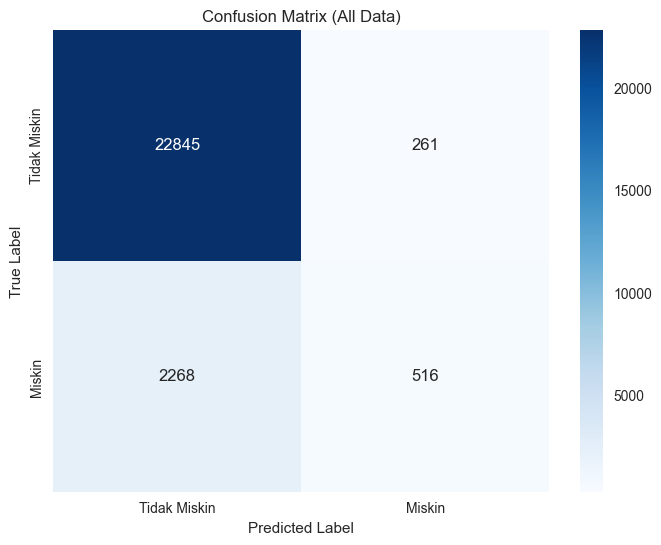

In [49]:
stacking_ensemble = StackingClassifier(
    estimators=[
        ('rf', pipeline_rf),
        ('svm', pipeline_svm)],
    final_estimator=LogisticRegression(penalty='elasticnet', solver='saga', C=2.6020327320478085, l1_ratio= 0.30626366615923717, random_state=74))
eval_model_all_data(stacking_ensemble, X_ori, y_ori, plot=True)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_18916\2547282434.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')


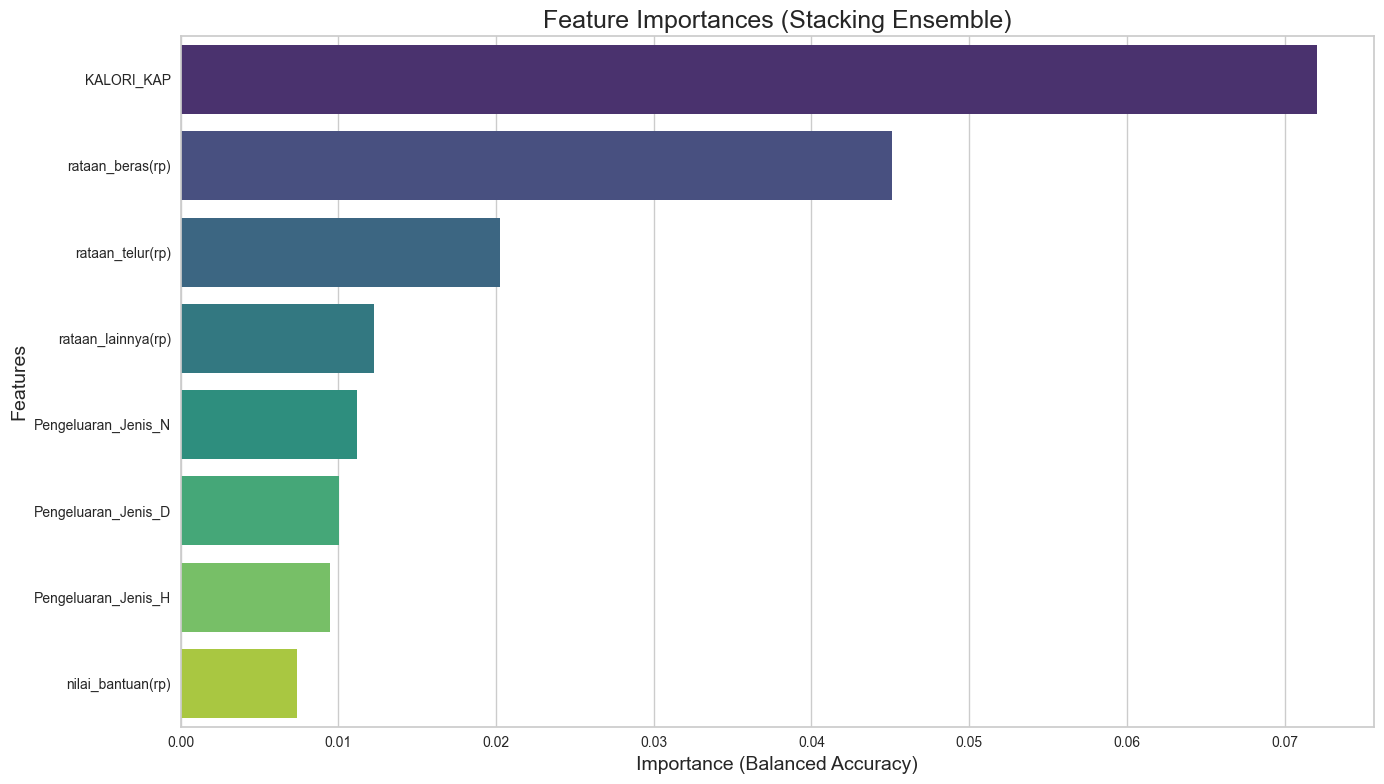

In [52]:
stacking_ensemble.fit(X_ori, y_ori)
result = permutation_importance(
    stacking_ensemble, X_ori, y_ori, 
    scoring='balanced_accuracy', n_repeats=5, random_state=74)

feature_importances = pd.DataFrame({
    'Feature': X_ori.columns,  
    'Importance': result.importances_mean  
}).sort_values(by='Importance', ascending=False).reset_index(drop=True)

plt.figure(figsize=(14, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')
plt.title('Feature Importances (Stacking Ensemble)', fontsize=18)
plt.xlabel('Importance (Balanced Accuracy)', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.tight_layout() 
plt.show()